In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
import csv
import sys
sys.path.append('/storage/home/hcoda1/4/ashelby8/Manitoba/pyNab/src/')
import nabPy as Nab
sys.path.append('/storage/home/hcoda1/4/ashelby8/calibration/calibration/')
from FitClass import SnCalibration
from FitClass import CdCalibration
from config import conf
import FitFuncs
import pandas as pd
import pylab as py
np.set_printoptions(threshold=sys.maxsize)
pd.set_option("display.max_colwidth", 15)

In [2]:
runs = [1374, 1389, 1391, 1392, 1393, 1395, 1399]
runs_Cd = [1407]

In [3]:
data = []
for i in range(len(runs)):
    with open('/storage/home/hcoda1/4/ashelby8/output%d.csv'%runs[i]) as f:
        csv.DictReader(f)
        data.append(pd.read_csv(f))
dataAll = pd.concat(data,ignore_index = True)

In [4]:
data = []
for i in range(len(runs_Cd)):
    with open('/storage/home/hcoda1/4/ashelby8/output%d.csv'%runs_Cd[i]) as f:
        csv.DictReader(f)
        data.append(pd.read_csv(f))
dataAll_Cd = pd.concat(data,ignore_index = True)

In [5]:
dataAll[dataAll['run']==1374].iloc[0]

run                          1374
pixel                          76
Bias Voltage                 -300
Proton                      False
Proton Energy                   0
Cd109                       False
Sn113                        True
Date Time [UTC]    2022-01-27 ...
trap rise                    1250
trap length                    50
trap decay                   1250
ecap               [ 6.0331278...
chi2_e                   1.921193
xray               [ 8.0742590...
chi2_x                 657.348671
CE                              3
Xray                            5
CE hist            [ 2  0  1  ...
Xray hist          [3168 2573 ...
Name: 0, dtype: object

In [74]:
dataAll_Cd

,run,pixel,Bias Voltage,Proton,Proton Energy,Cd109,Sn113,Date Time [UTC],trap rise,trap length,trap decay,ecap,chi2_e,xray,chi2_x,CE,Xray,CE hist,Xray hist
0,1407,76,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[134.19815...,[39.6668531...,[ 9.2196245...,8.361049e+03,"[1, 2]",3,"[[31, 36, 3...",[4149 3594 ...
1,1407,77,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[148.88548...,[115.648609...,[ 9.1914283...,6.628593e+03,"[1, 2]",3,"[[45, 46, 4...",[3984 3349 ...
2,1407,78,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[139.82470...,[97.5855191...,[ 2.8197647...,1.195641e+03,"[1, 2]",3,"[[31, 33, 3...",[1334 1134 ...
3,1407,87,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[98.845301...,[57.4638140...,[ 8.4424787...,1.203635e+04,"[1, 2]",3,"[[31, 29, 3...",[3712 3246 ...
4,1407,88,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[104.43049...,[131.552275...,[ 1.0994826...,6.216719e+03,"[1, 2]",3,"[[28, 33, 4...",[4386 3583 ...
5,1407,96,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[69.356161...,[39.3388863...,[ 5.4512989...,7.282508e+03,"[1, 2]",3,"[[27, 27, 1...",[2671 2586 ...
6,1407,97,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[90.729513...,[55.2467256...,[ 7.8925777...,1.242543e+04,"[1, 2]",3,"[[25, 37, 2...",[3939 3594 ...
7,1407,98,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[-2.599046...,[8.44213784...,[ 1.9376000...,6.062173e+06,"[0, 0]",0,"[[0, 0, 0, ...",[19176 ...
8,1407,101,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[41.573313...,[38.9993344...,[ 3.2197463...,1.662380e+02,"[1, 2]",3,"[[16, 30, 3...",[258 224 15...
9,1407,103,-300,False,0,True,False,2022-02-04 ...,1250,50,1250,[[27.845833...,[27.2199957...,[ 4.1875985...,1.912905e+02,"[1, 2]",3,"[[20, 23, 1...",[315 273 18...


In [8]:
pix_index = [np.int16(dataAll[dataAll['run']==1374]['pixel'][0]),np.int16(dataAll[dataAll['run']==1374]['pixel'][3]),
             np.int16(dataAll[dataAll['run']==1374]['pixel'][6]),np.int16(dataAll[dataAll['run']==1374]['pixel'][11]),
             np.int16(dataAll[dataAll['run']==1374]['pixel'][14])]

In [9]:
pix_index

[np.int16(76), np.int16(87), np.int16(97), np.int16(106), np.int16(114)]

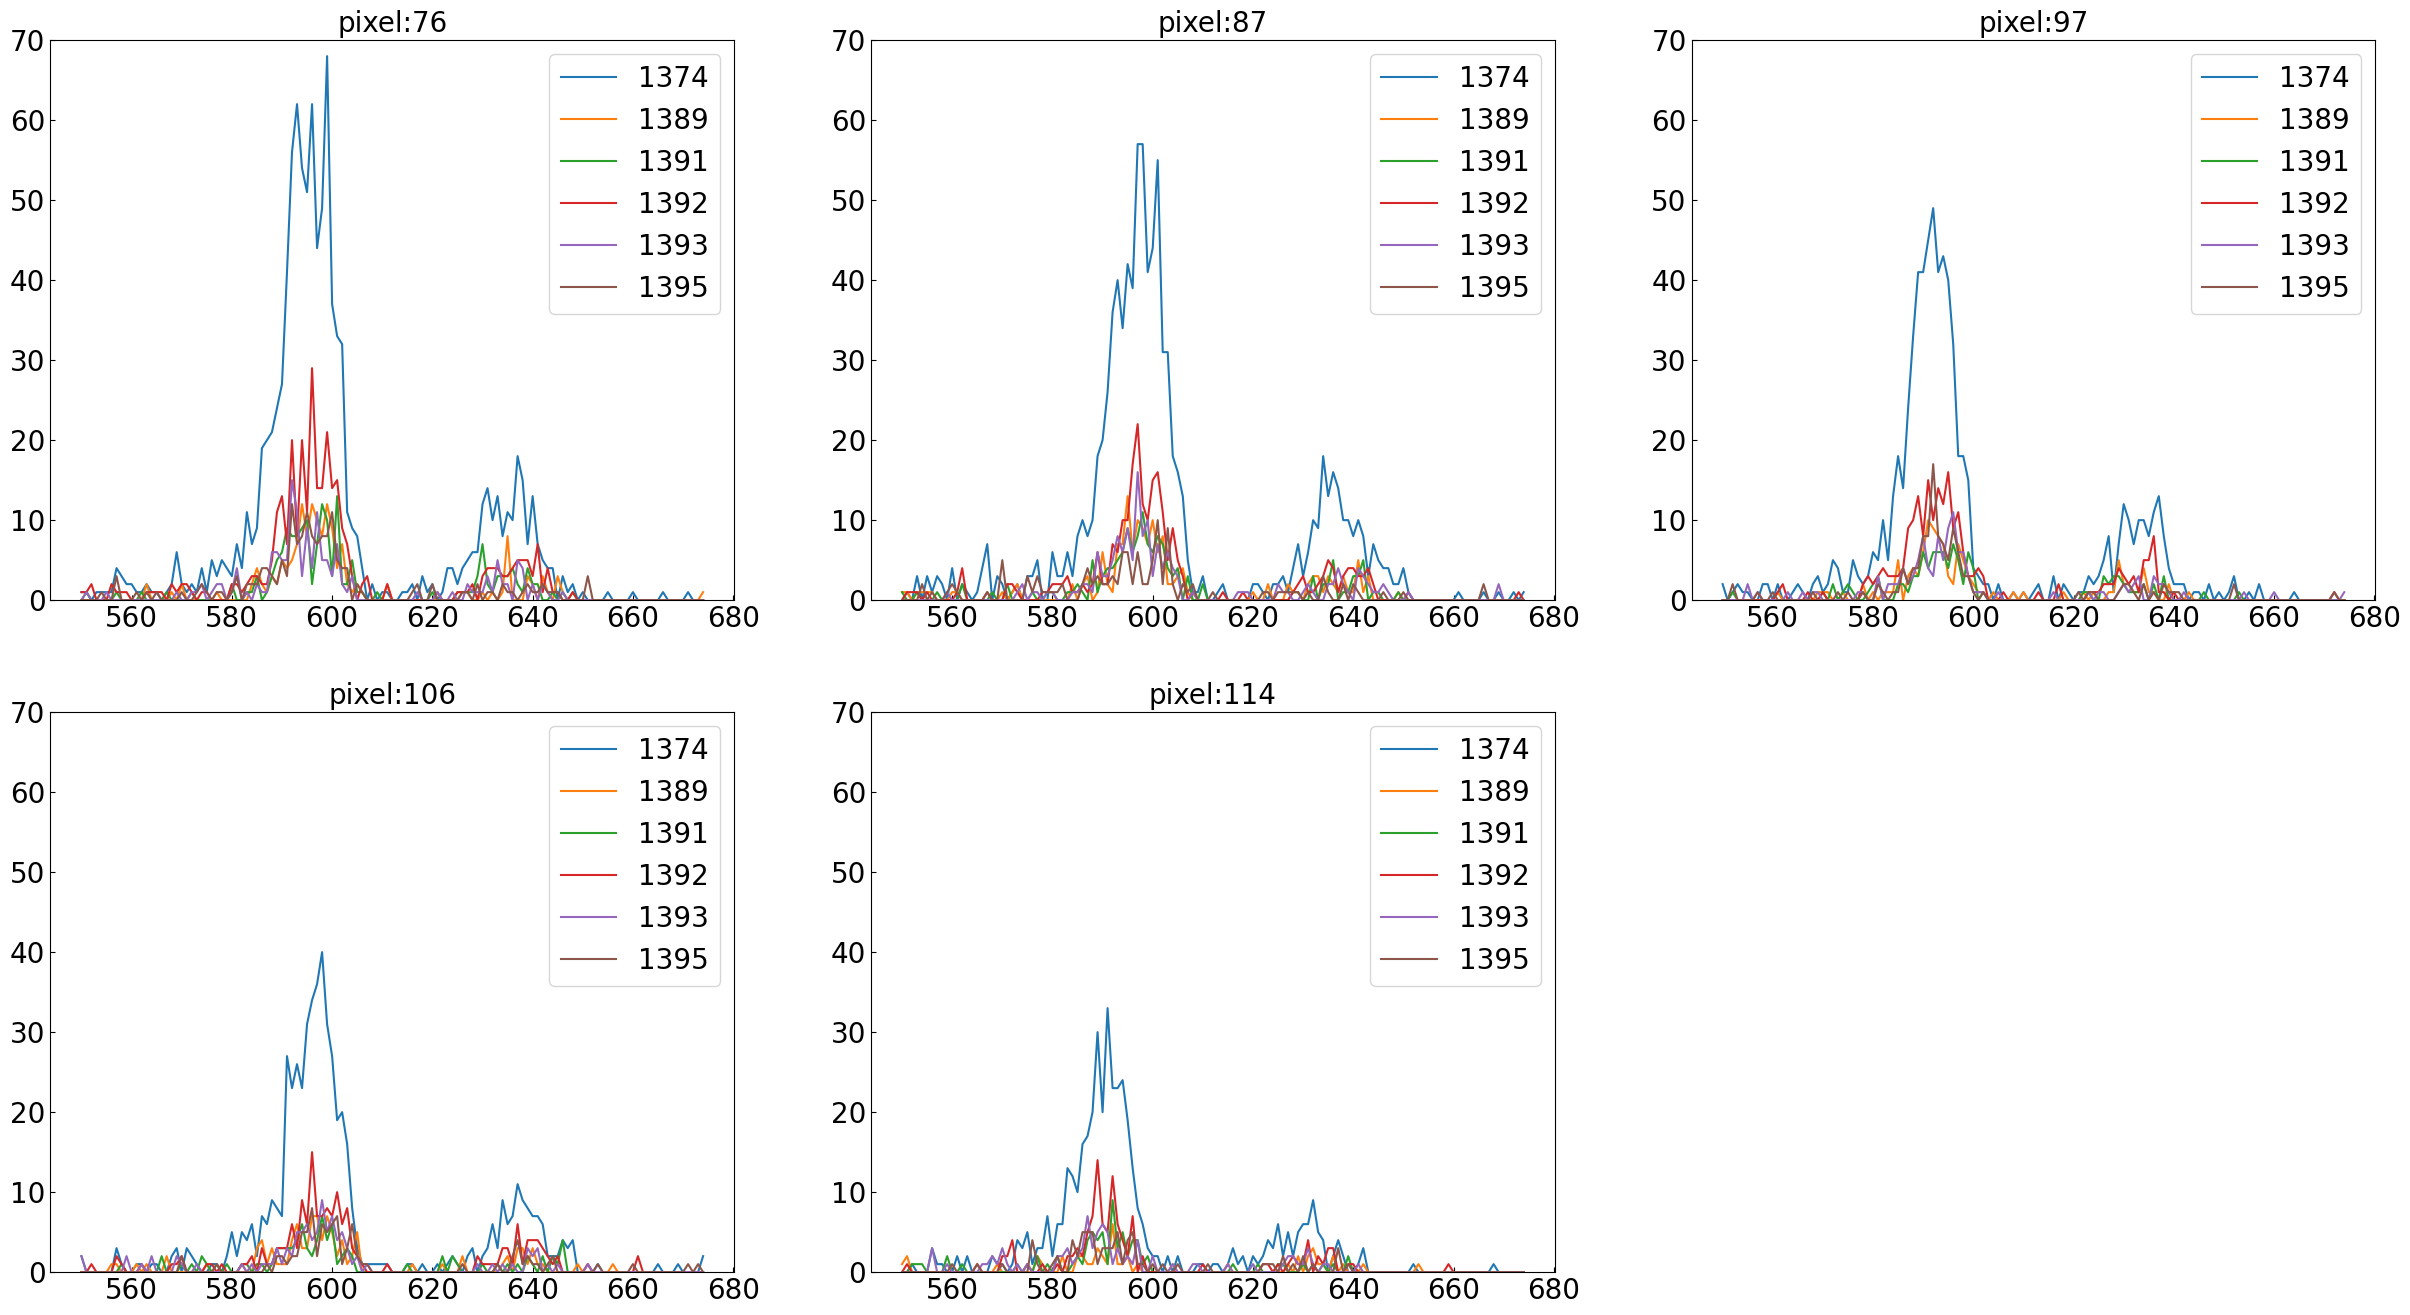

In [10]:
nrows,ncols=2,3
py.figure(figsize=(10*ncols,8*nrows))
x = np.arange(550,675)
# print(len(x))
# for i in range(7):
conf['capture'] = 'one'
conf['xray'] = 'OFF'
Sn = SnCalibration()
        
        #plot all the fits with the same initilization on the same graph
        
        
        #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
# plt.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==87].iloc[4]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[1])
cnt = 0
for j in pix_index:
    cnt +=1
    for i in range(6):
        ax=py.subplot(nrows,ncols,cnt)
        ax.plot(x,np.float64(dataAll[dataAll['pixel']==j].iloc[i]['CE hist'].replace('[','').replace(']','').split())[250:375],label = '%d'%runs[i])
        ax.set_ylim(0,70)
        ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
        ax.set_title('pixel:%d'%j,size=20)
        ax.legend(prop={'size':20})
plt.show()

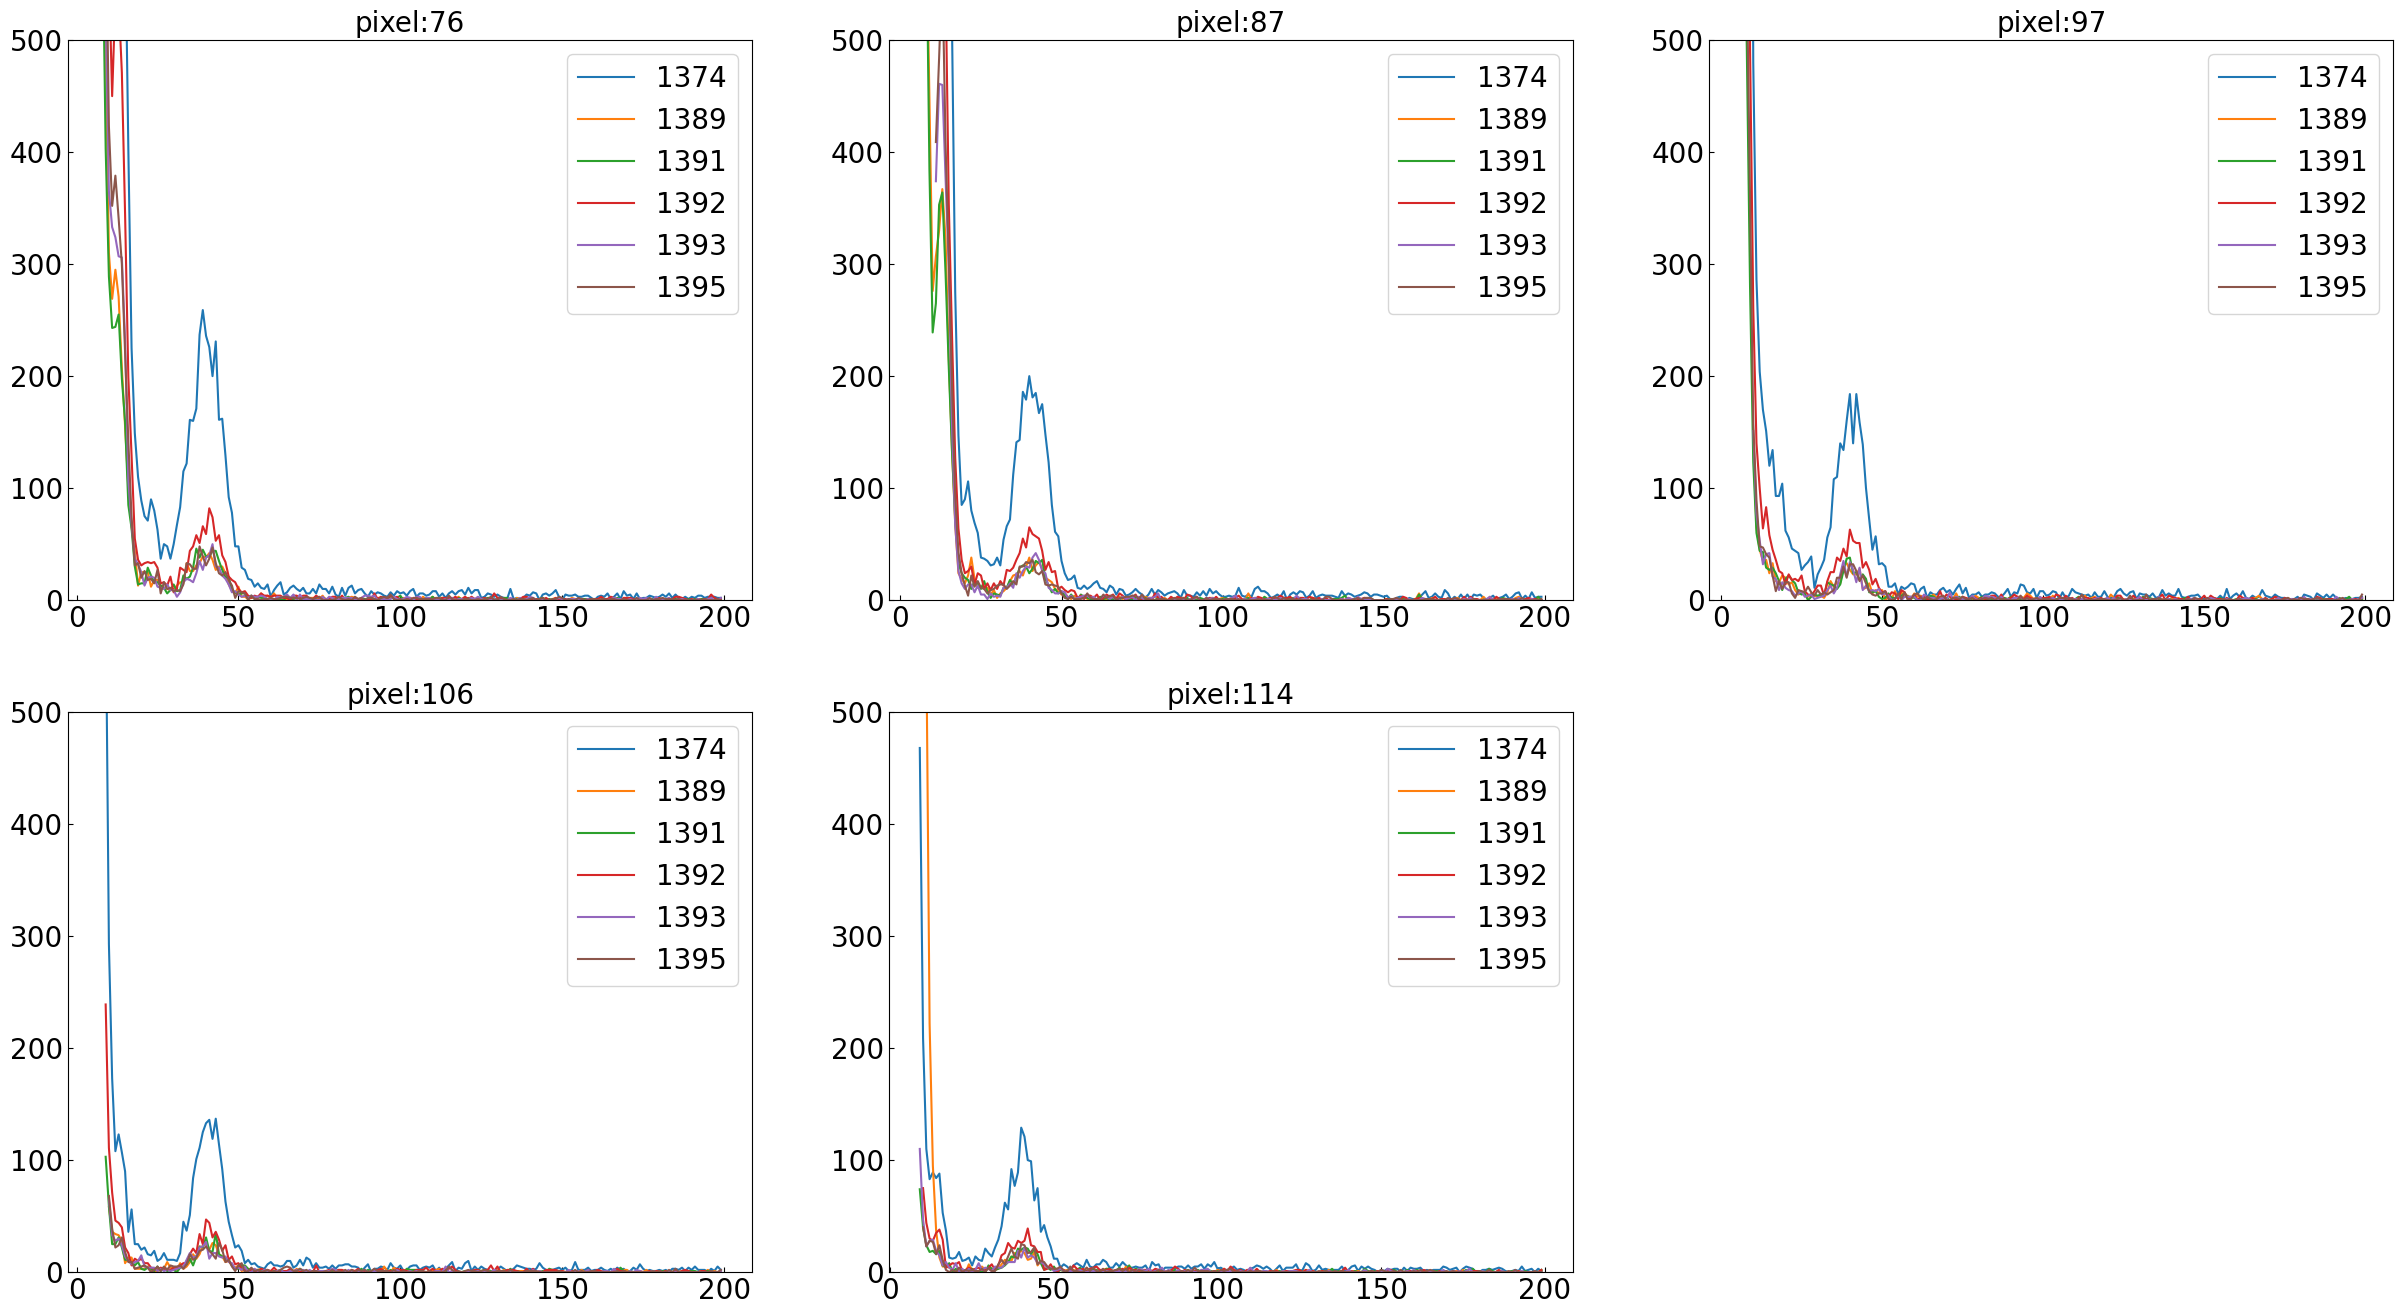

In [52]:
nrows,ncols=2,3
py.figure(figsize=(10*ncols,8*nrows))


cnt = 0
for j in pix_index:
    cnt +=1
    for i in range(6):

        x = np.arange(7,200)
        if j==87:
            if i==1 or i==2:
                x = np.arange(6,200)
            elif i==4 or i==5:
                x = np.arange(11,200)
            else:
                x = np.arange(7,200)
        if j==97:
            if i==1 or i==4:
                x = np.arange(10,200)
            elif i==2 or i==3 or i==5:
                x = np.arange(6,200)
            else:
                x = np.arange(7,200)
        if j==106:
            if i==1 or i==4 or i==5:
                x = np.arange(10,200)
            elif i==2 or i==3:
                x = np.arange(9,200)
            else:
                x = np.arange(7,200)
        if j==114:
            if i==1:
                x = np.arange(11,200)
            elif i==0 or i==2 or i==4:
                x = np.arange(9,200)
            elif i==3 or i==5:
                x = np.arange(10,200)
            else:
                x = np.arange(7,200)
            
        ax=py.subplot(nrows,ncols,cnt)
        ax.plot(x,np.float64(dataAll[dataAll['pixel']==j].iloc[i]['Xray hist'].replace('[','').replace(']','').split()),label = '%d'%runs[i])
        ax.set_ylim(0,500)
        ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
        ax.set_title('pixel:%d'%j,size=20)
        ax.legend(prop={'size':20})
plt.show()

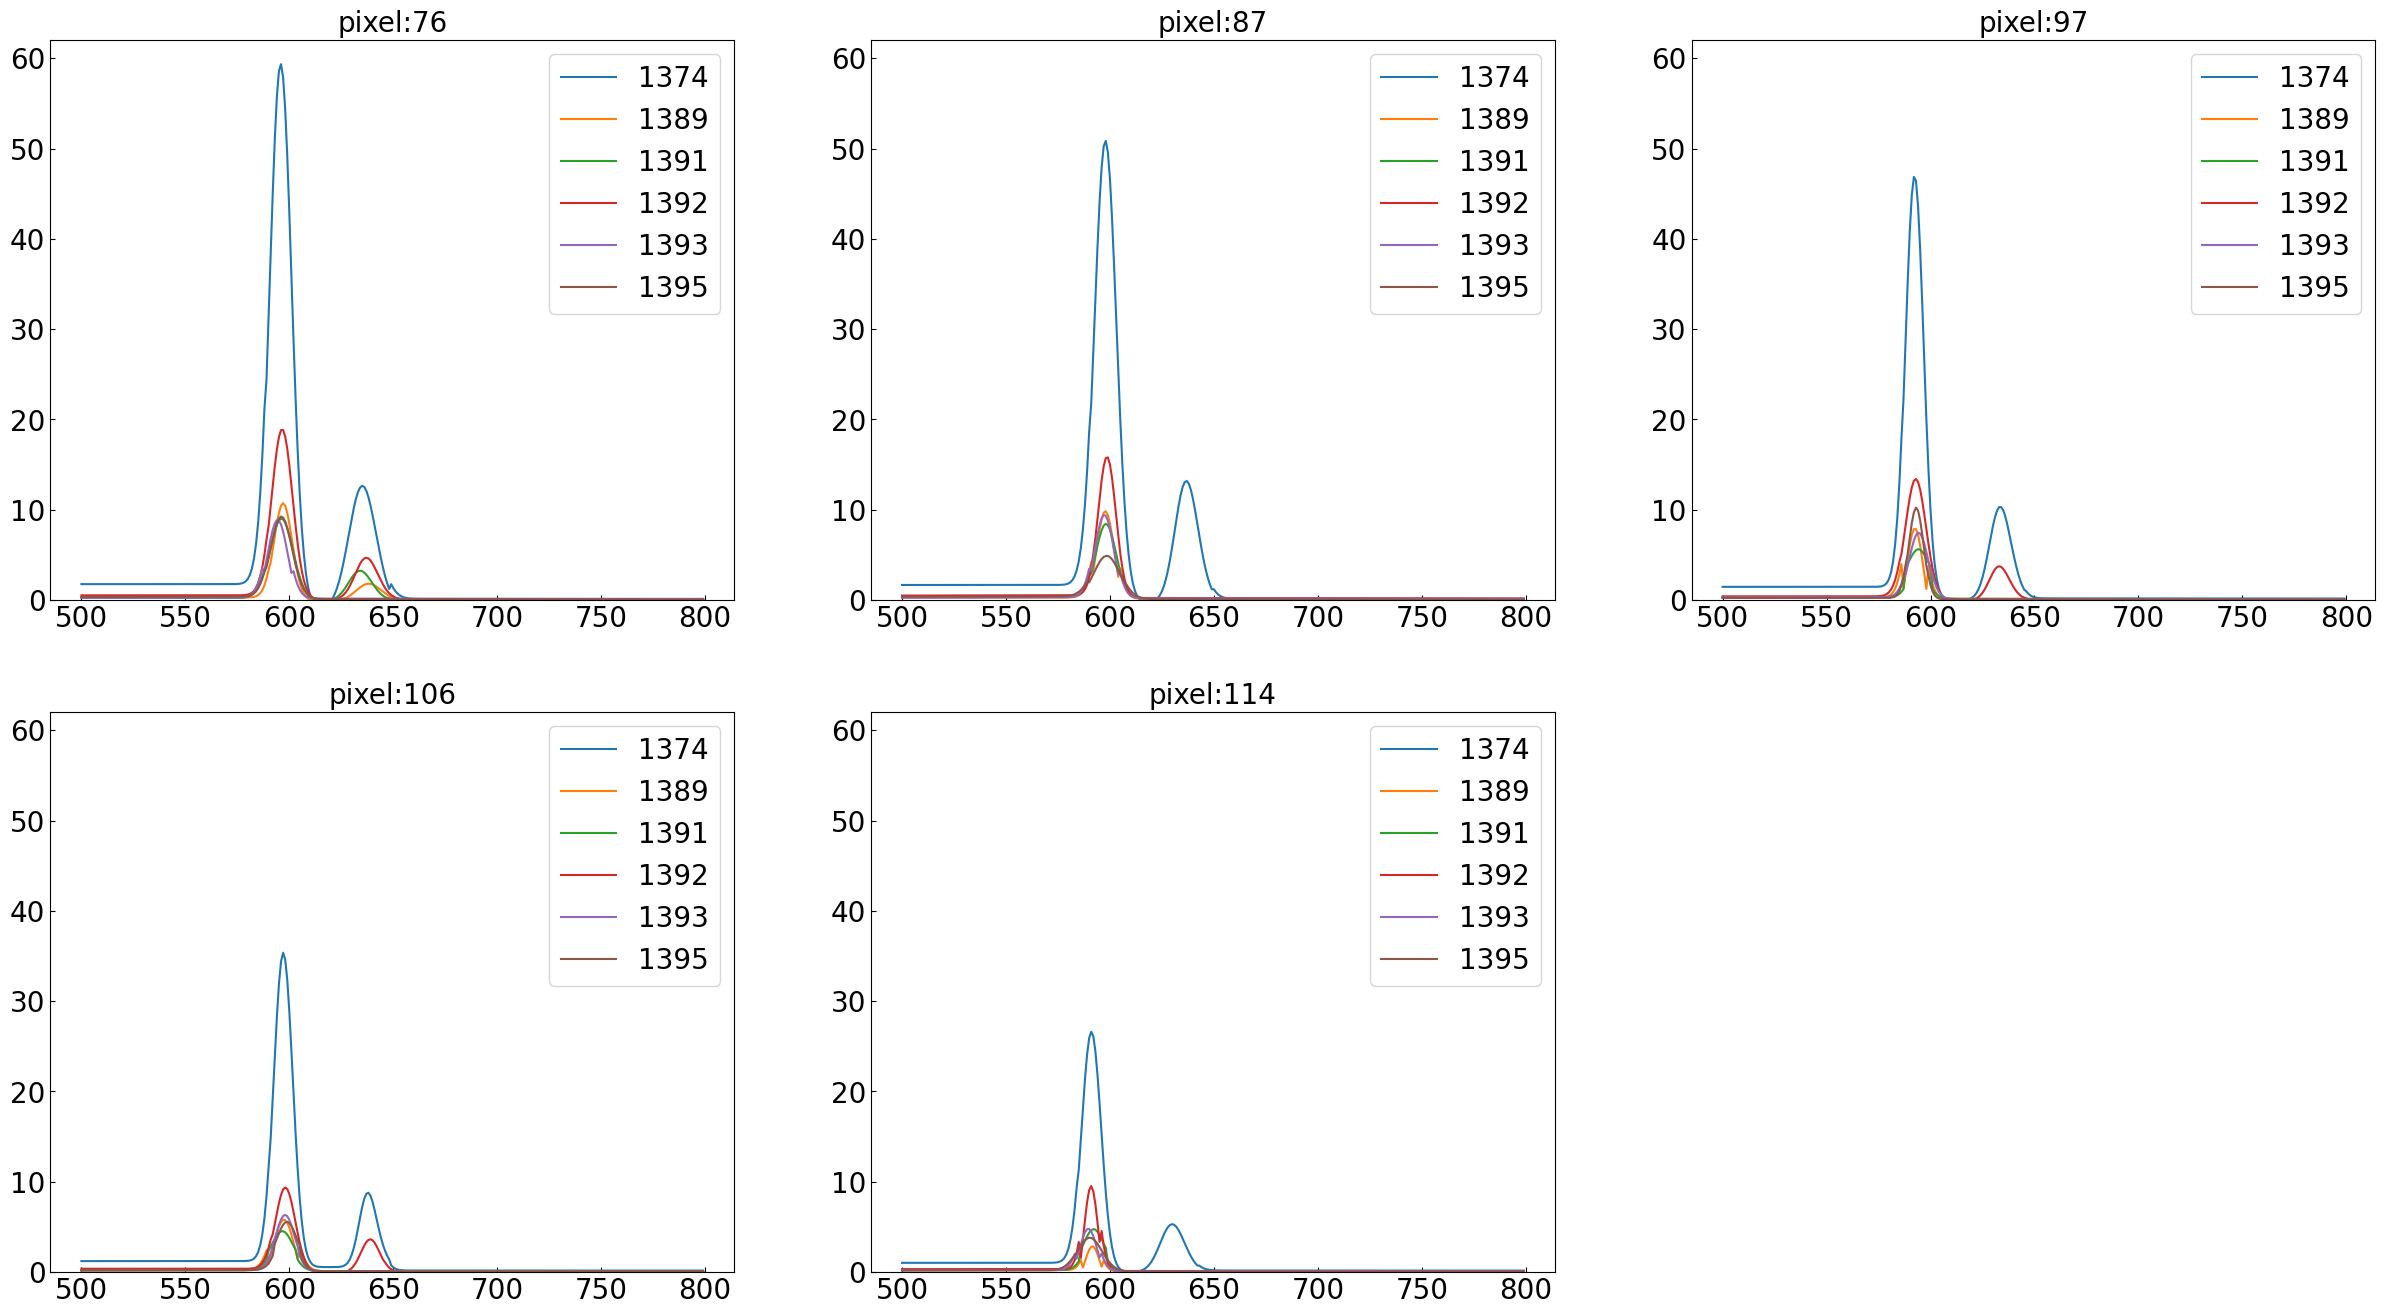

In [53]:
nrows,ncols=2,3
py.figure(figsize=(10*ncols,8*nrows))


x = np.arange(500,800)
conf['xray'] = 'OFF'
cnt = 0
for j in pix_index:
    cnt +=1
    ax=py.subplot(nrows,ncols,cnt)
    ax.set_title('pixel:%d'%j,size=20)
    ax.set_ylim(0,62)
    ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
    for i in range(6):
        
        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==3:
            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'three'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend(prop={'size':20})
            

        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==2:

            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'two'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend(prop={'size':20})

        if dataAll[dataAll['pixel']==j].iloc[i]['CE']==1:

            #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture'] = 'one'
            Sn = SnCalibration()

            #plot all the fits with the same initilization on the same graph
            

            #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend(prop={'size':20})


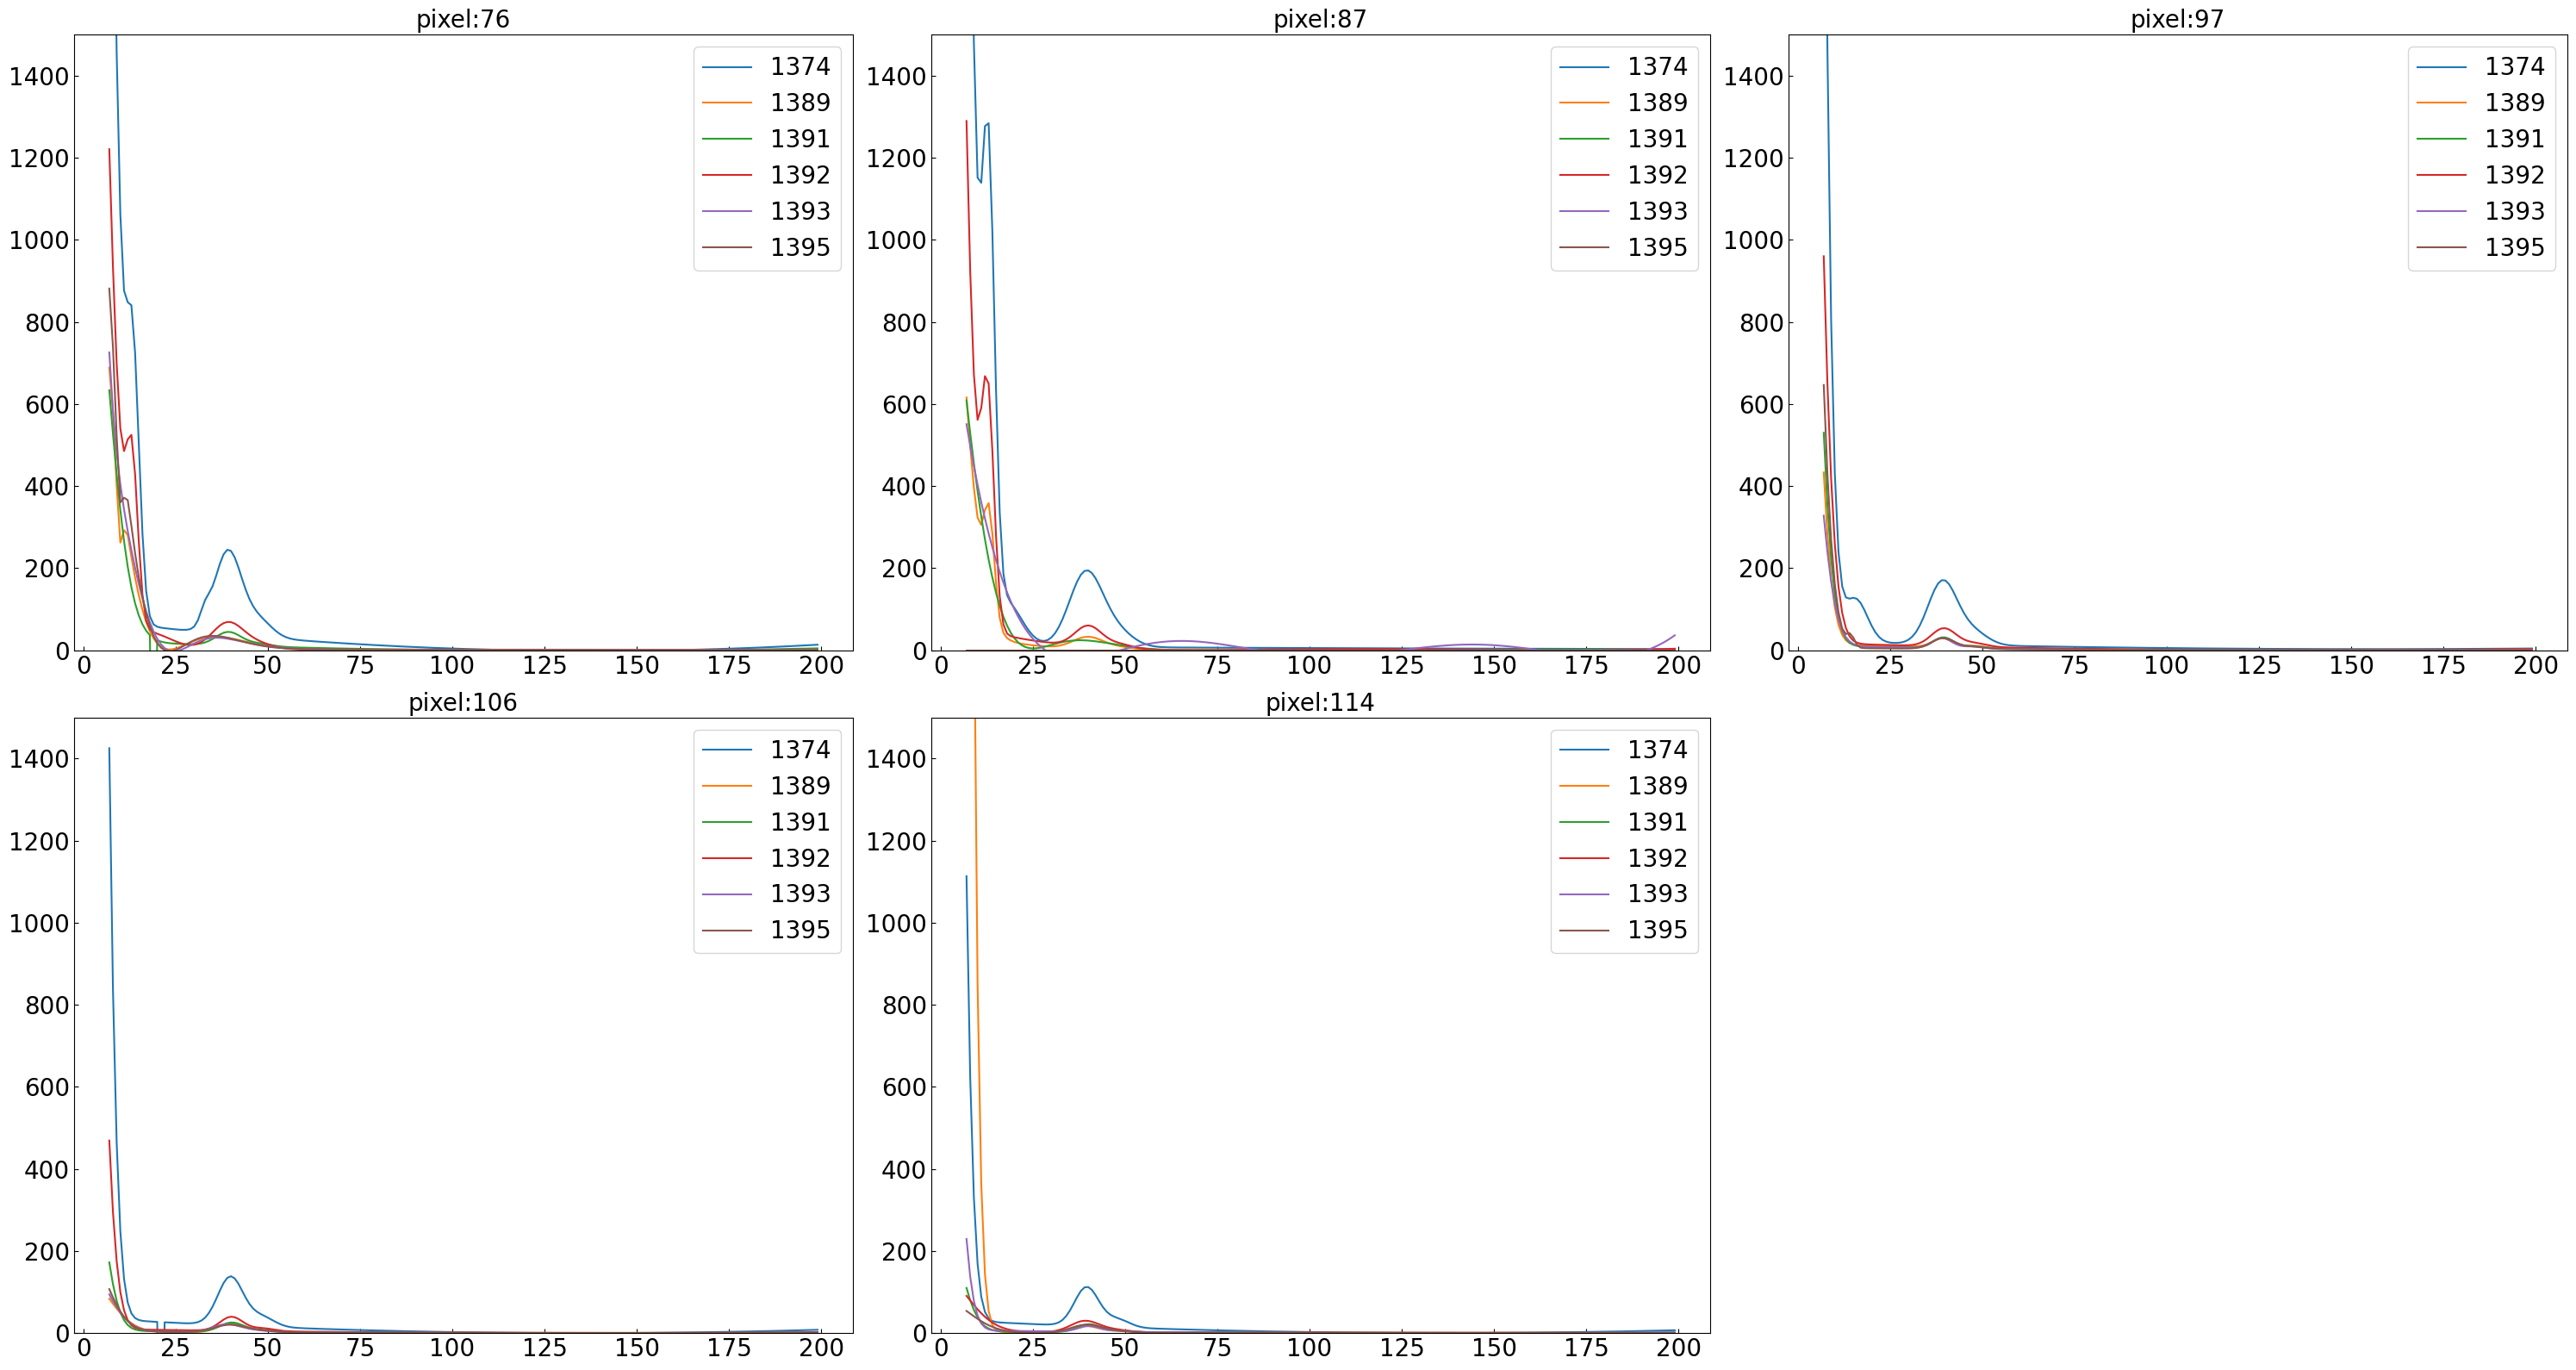

In [54]:
nrows,ncols=2,3
py.figure(figsize=(10*ncols,8*nrows))


x = np.arange(7,200)
conf['capture'] = 'OFF'
cnt = 0
for j in pix_index:
    cnt +=1
    ax=py.subplot(nrows,ncols,cnt)
    ax.set_title('pixel:%d'%j,size=20)
    ax.set_ylim(0,1500)
    ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
    for i in range(6):
        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==5:

            conf['xray'] = 'five'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend(prop={'size':20})

        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==4:

            conf['xray'] = 'four'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)
            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend(prop={'size':20})

        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==3:

            conf['xray'] = 'three'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)

            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend(prop={'size':20})
            
#         if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==2:

#             conf['xray'] = 'two'
#             Sn = SnCalibration()

#             ax=py.subplot(nrows,ncols,cnt)

#             ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
#             ax.legend()


        if dataAll[dataAll['pixel']==j].iloc[i]['Xray']==2:

            conf['xray'] = 'zero'
            Sn = SnCalibration()

            ax=py.subplot(nrows,ncols,cnt)

            ax.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==j].iloc[i]['xray'].replace('[','').replace(']','').split())),label = '%d'%runs[i])
            ax.legend(prop={'size':20})

py.tight_layout()

In [3]:
%%time

runNumber = 1407
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/Cd109_-300V/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 3.62 s, sys: 10.1 s, total: 13.8 s
Wall time: 6min 19s


In [96]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

CPU times: user 39.2 s, sys: 4.58 s, total: 43.7 s
Wall time: 18.4 s


In [97]:
bins=np.arange(0,200)

In [98]:
histogram, bin_edges = np.histogram(results.data()['energy'], bins = bins)

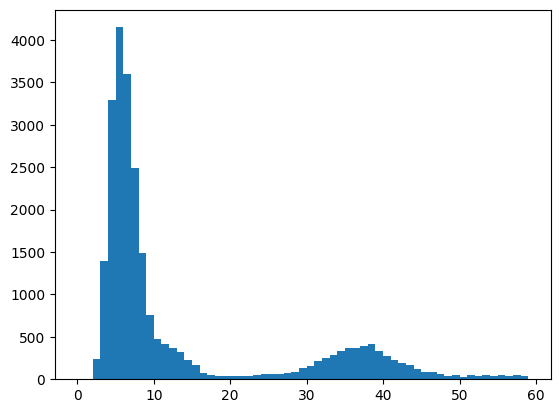

In [99]:
plt.hist(results.data()['energy'],bins=np.arange(0,60))
plt.show()

In [100]:
conf['capture1'] = ''
conf['capture2'] = ''
conf['xray'] = ''
Cd = CdCalibration()
CEpeak1, CEcenter1 = FitFuncs.get_peak(results,Cd.CE1[0],Cd.CE1[1])
CEpeak2, CEcenter2 = FitFuncs.get_peak(results,Cd.CE2[0],Cd.CE2[1])
thresh_peak, thresh_start = FitFuncs.get_peak(results,Cd.X1[0],Cd.X1[1])
Xpeak, Xcenter = FitFuncs.get_peak(results,Cd.X2[0],Cd.X2[1])

In [101]:
Xpeak

np.int64(412)

In [102]:
Cd.X2[0],Cd.X2[1]

(25.0, 50.0)

In [103]:
conf['xray'] = 'OFF'
conf['capture2']= 'OFF'
conf['capture1'] = 'ON'
Cd = CdCalibration()
bins = np.arange(Cd.CE1[0],Cd.CE1[1])

pars = [CEpeak1, CEcenter1, 5, 1, 2, 1e-8, 1]

histogram, bin_edges = np.histogram(results.data()['energy'], bins = bins)

width = bin_edges[1]-bin_edges[0]

hist, prams, chi, err = Cd.fitter(results,bins,pars)

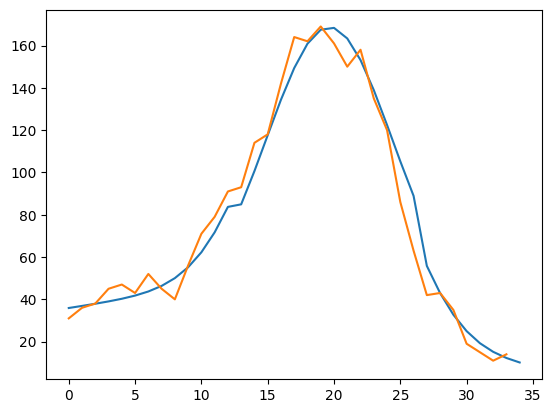

In [104]:
x = bins
plt.plot(Cd.get_fit(x,*prams))
plt.plot(hist)
plt.show()

In [105]:
conf['xray'] = 'OFF'
conf['capture2']= 'two'
conf['capture1'] = 'OFF'
Cd = CdCalibration()

bins = np.arange(Cd.CE2[0],Cd.CE2[1])

histogram, bin_edges = np.histogram(results.data()['energy'], bins = bins)

width = bin_edges[1]-bin_edges[0]
pars = [CEpeak2, CEcenter2, 5, 1, 2, 1e-8, 1]

hist, prams, chi, err = Cd.fitter(results,bins,pars)

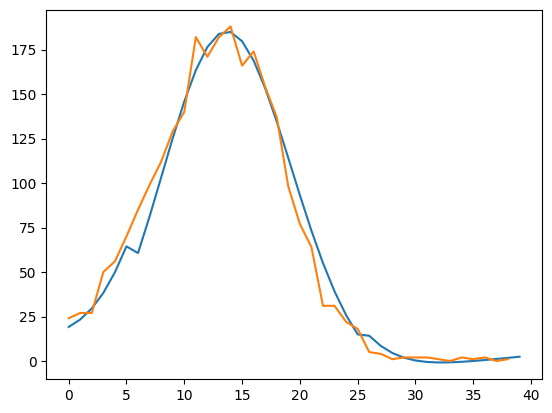

In [106]:
x = bins
plt.plot(Cd.get_fit(x,*prams))
plt.plot(hist)
plt.show()

In [107]:
conf['xray'] = 'three'
conf['capture2']= 'OFF'
conf['capture1'] = 'OFF'
Cd = CdCalibration()

bins = np.arange(thresh_start,Cd.X1[1])

histogram, bin_edges = np.histogram(results.data()['energy'], bins = bins)

width = bin_edges[1]-bin_edges[0]
pars = [thresh_peak+200, 0, thresh_start+1, Xpeak, Xcenter, 5, 1, 1, 3, 5]

hist, prams, chi, err = Cd.fitter(results,bins,pars)

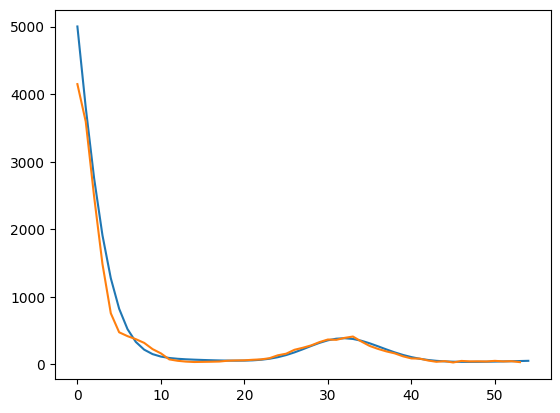

In [108]:
x = bins
plt.plot(Cd.get_fit(x,*prams))
plt.plot(hist)
plt.show()

In [102]:
float(dataAll_Cd[dataAll_Cd['run']==1407].iloc[7]['CE'].replace('[','').replace(']','').split(',')[0])==0

True

In [144]:
np.float64(dataAll_Cd[dataAll_Cd['run']==1407].iloc[0]['ecap'].replace('[[','').replace(']]','').split('], [')[0].split(','))


dataAll_Cd[dataAll_Cd['pixel']]

KeyError: "None of [Index([ 76,  77,  78,  87,  88,  96,  97,  98, 101, 103, 105, 106, 107, 113,\n       114, 115, 116, 121, 122, 123, 124],\n      dtype='int64')] are in the [columns]"

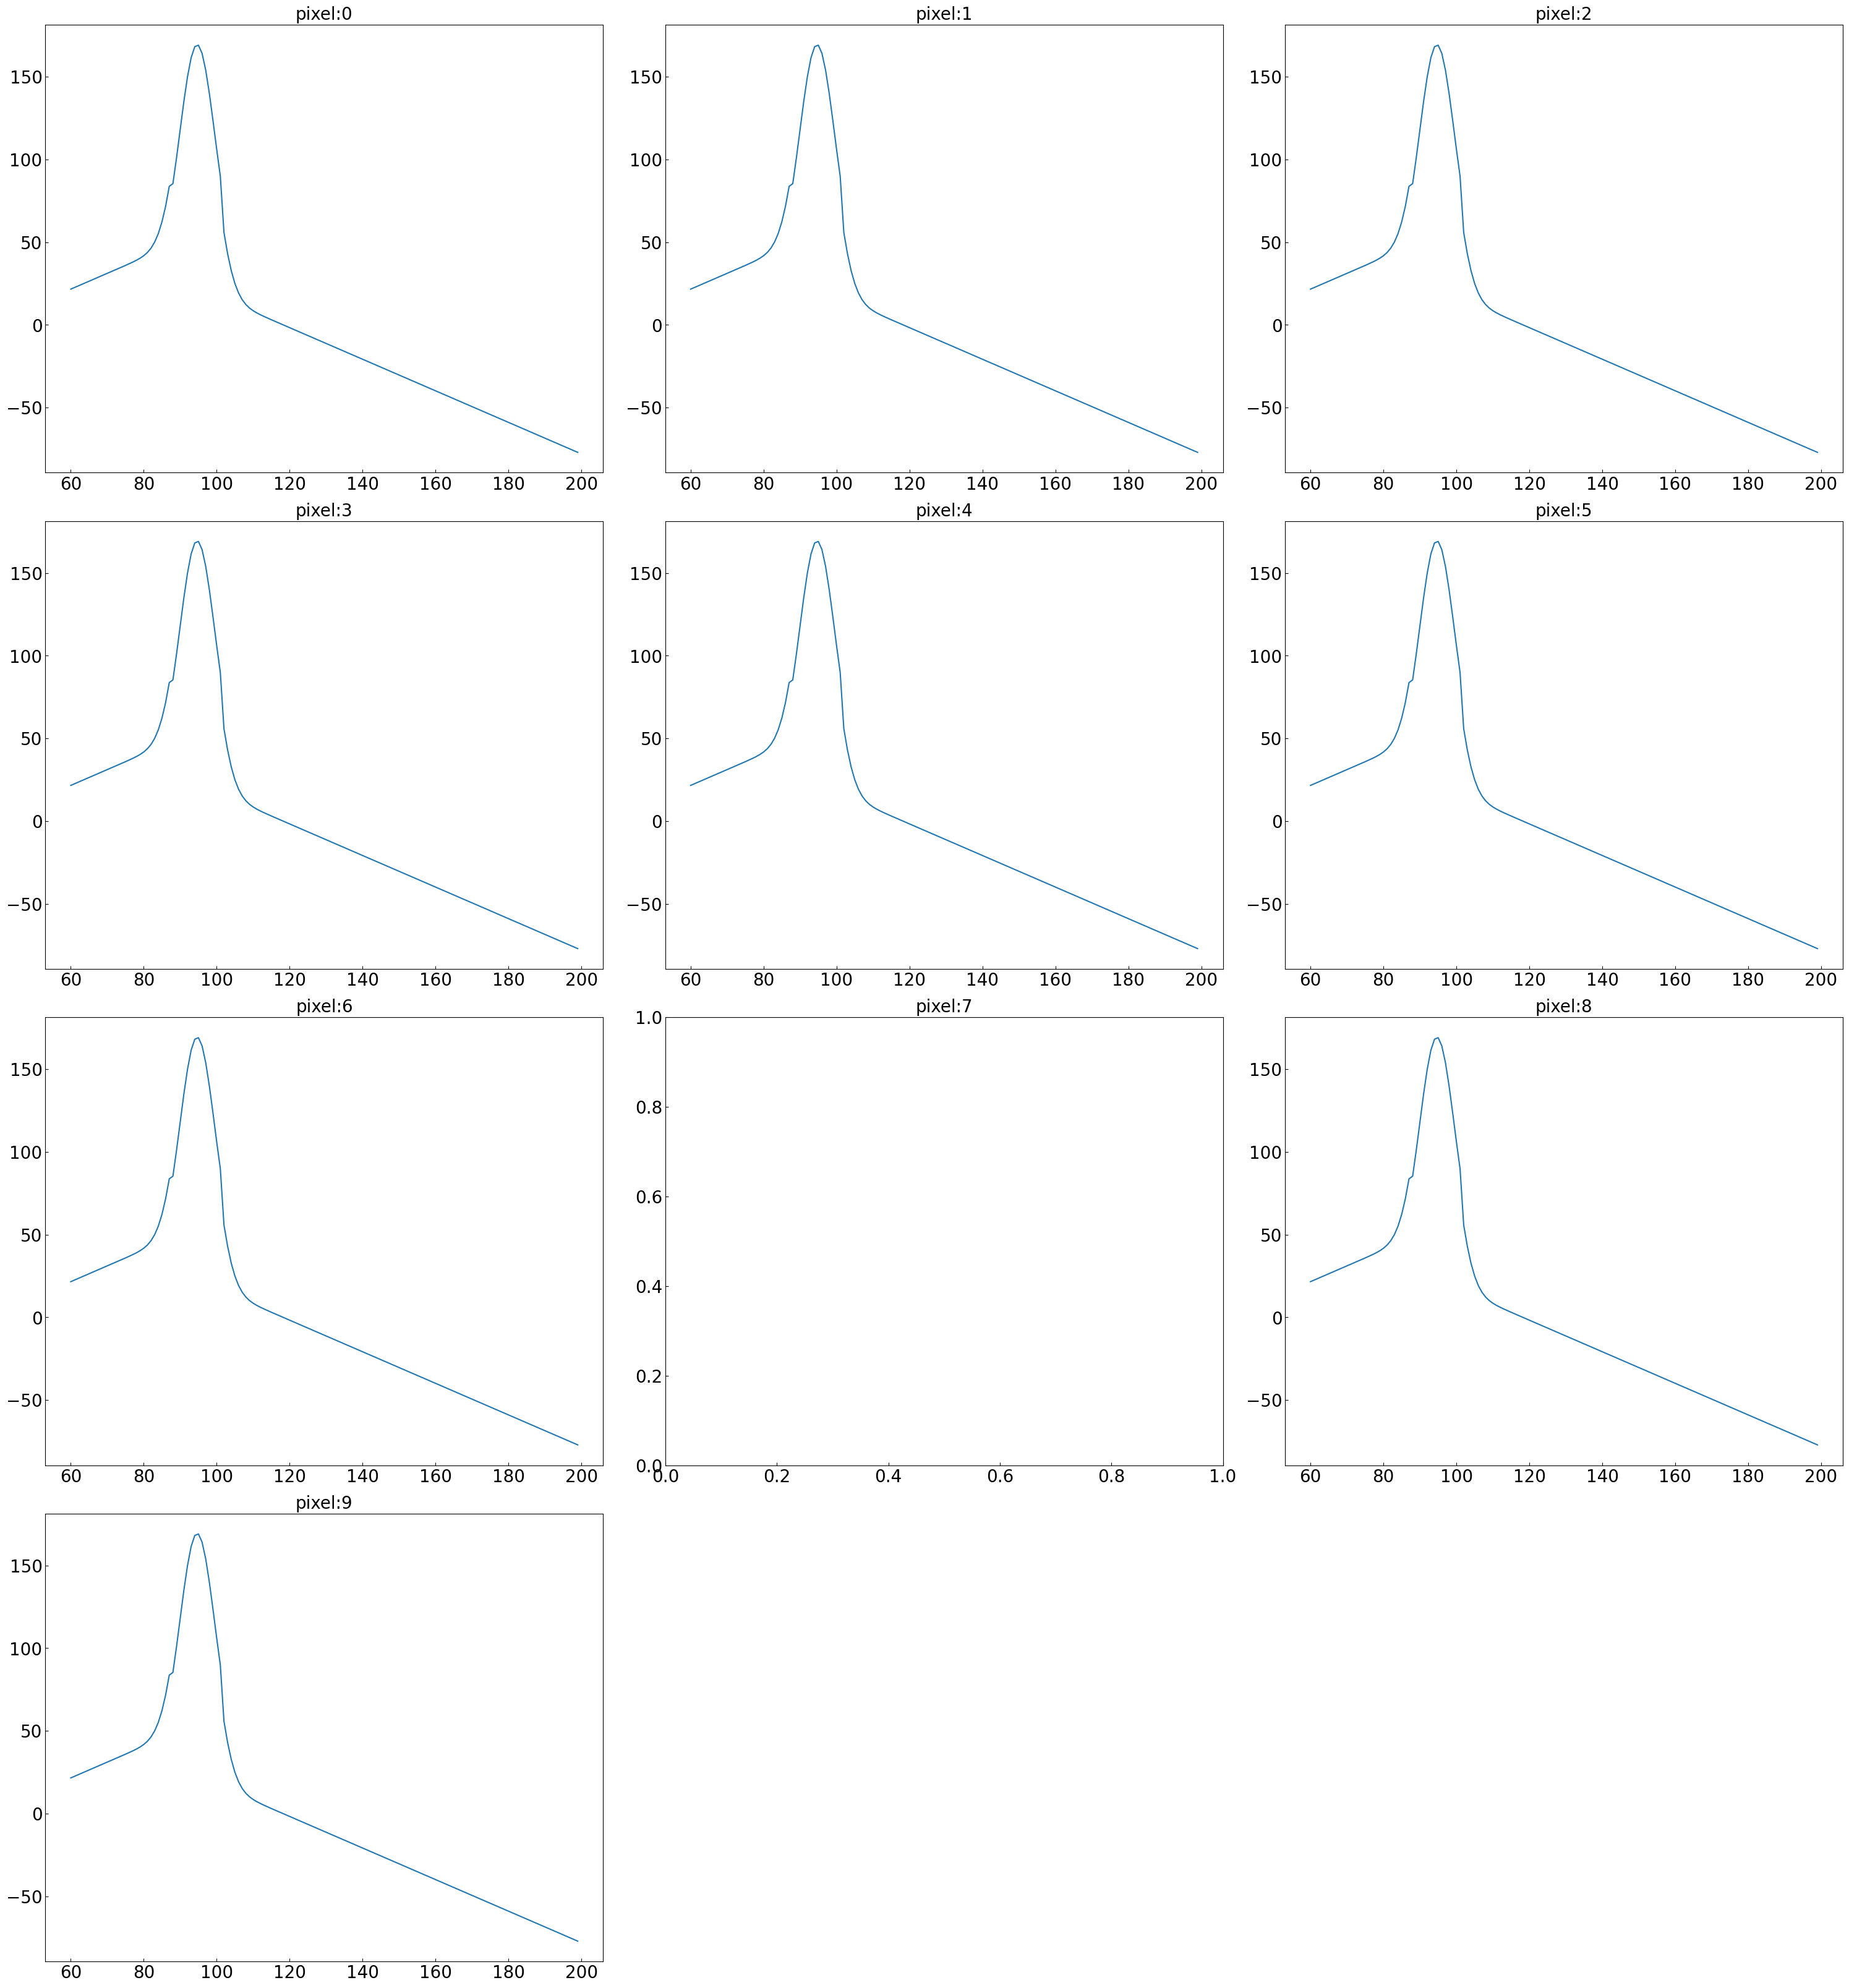

In [139]:
nrows,ncols=7,3
py.figure(figsize=(10*ncols,8*nrows))
x = np.arange(60,200)
conf['xray'] = 'OFF'
conf['capture2']= 'OFF'

cnt = 0
for j in range(10):
    cnt +=1
    ax=py.subplot(nrows,ncols,cnt)
    ax.set_title('pixel:%d'%j,size=20)
#     ax.set_ylim(0,60)
    ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
    for i in range(1):
        if float(dataAll_Cd[dataAll_Cd['run']==runs_Cd[i]].iloc[j]['CE'].replace('[','').replace(']','').split(',')[0])== 1:
        #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
            conf['capture1'] = 'ON'
            Cd = CdCalibration()

        #plot all the fits with the same initilization on the same graph


        #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
            ax.plot(x,Cd.get_fit(x,*np.float64(dataAll_Cd[dataAll_Cd['run']==1407].iloc[0]['ecap'].replace('[[','').replace(']]','').split('], [')[0].split(','))),label = '%d'%runs_Cd[i])
# #         ax.legend(prop={'size':20})
                    
#         if float(dataAll_Cd[dataAll_Cd['run']==runs_Cd[i]].iloc[j]['CE'].replace('[','').replace(']','').split(',')[0])==0:
#             #need to initialize the class to get the correct fit function based on the same recorded initilizing flag in column "CE"
#             conf['capture1'] = 'zero'
#             Cd = CdCalibration()
            
#             ax.plot(x,Cd.get_fit(x,*np.float64(dataAll_Cd[dataAll_Cd['run']==1407].iloc[0]['ecap'].replace('[[','').replace(']]','').split('], [')[0].split(',')),label = '%d'%runs_Cd[i])
# #             ax.legend(prop={'size':20})
py.tight_layout()

In [130]:
nrows,ncols=2,3
py.figure(figsize=(10*ncols,8*nrows))
x = np.arange(550,675)
# print(len(x))
# for i in range(7):
conf['capture'] = 'one'
conf['xray'] = 'OFF'
Sn = SnCalibration()
        
        #plot all the fits with the same initilization on the same graph
        
        
        #need to convert the stored parameter string into the corresponding numerical values and plot Sn.get_fit (the fitting function)
# plt.plot(x,Sn.get_fit(x,*np.float64(dataAll[dataAll['pixel']==87].iloc[4]['ecap'].replace('[','').replace(']','').split())),label = '%d'%runs[1])
cnt = 0
for j in pix_index:
    cnt +=1
    for i in range(6):
        ax=py.subplot(nrows,ncols,cnt)
        ax.plot(x,np.float64(dataAll[dataAll['pixel']==j].iloc[i]['CE hist'].replace('[','').replace(']','').split())[250:375])
# plt.ylim(0,100)
# plt.xlim(7,100)
plt.show()

NameError: name 'pix_index' is not defined

<Figure size 3000x1600 with 0 Axes>

In [4]:
%%time

runNumber = 1395
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 1.3 s, sys: 3.62 s, total: 4.92 s
Wall time: 14.9 s


In [5]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

CPU times: user 6.17 s, sys: 886 ms, total: 7.06 s
Wall time: 2.81 s


In [23]:
conf['capture'] = 'OFF'
conf['xray'] = 'four'
Sn = SnCalibration()
thresh_peak, thresh_start = FitFuncs.get_peak(results,Sn.X1[0],Sn.X1[1])
bins = np.arange(thresh_start,200)
Xpeak, Xcenter = FitFuncs.get_peak(results,Sn.X2[0],Sn.X2[1])
peak1,center1 = FitFuncs.get_peak(results,thresh_start+5,thresh_start+7)
peak2, center2 = FitFuncs.get_peak(results,20,22)

pars = [thresh_peak+400, 0, thresh_start, peak1, center1, 4, Xpeak, Xcenter,5, 10, 1, 3, 5]
hist, prams, chi, err = Sn.fitter(results,bins,pars)

In [24]:
prams

array([ 7.52783882e+03,  0.00000000e+00,  2.04192284e+01, -6.02717691e+03,
        4.00544526e+00,  1.85583814e+01, -1.37371660e-02,  2.02217881e+02,
        1.56499804e-01,  1.90745924e+07, -1.90745864e+07, -6.88660510e-02,
        2.12981007e-04])

In [25]:
Xcenter

37.0

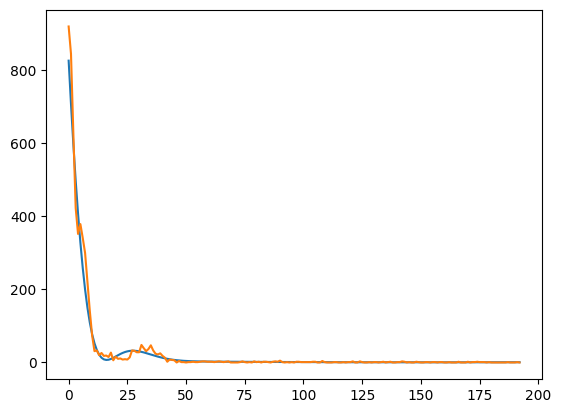

In [26]:
x = np.arange(7,200)
plt.plot(Sn.get_fit(x,*prams))
plt.plot(hist)
# plt.ylim(0,100)

In [56]:
#set up coumn naming scheme for the fit parameters
names = []
for i in range(10):
    names.append('p%d'%i)
names_xray = []
for i in range(16):
    names_xray.append('p%d'%i)

In [57]:
#create the parameter data frames
df_ecap = {}
for k in range(len(runs)):
    print(runs[k])
    df1 = {}
    for i in range(len(names)):
        df1[names[i]] = {}
        
        for j in range(20):
            j = j+k*21
            par_list = np.float64(dataAll[dataAll['run']==runs[k]]['ecap'][j].replace('[','').replace(']','').split()).tolist()

        #depending on the fit type used for each pixel, the numer of parameters obtained changes
        #need to add in empty slots for pixels with fewer to be able to construct the dataframe
            if len(par_list) != len(names):
                par_list.extend(['']*(len(names)-len(par_list)))

            df1[names[i]][j] = par_list[i]
    ecap_data = pd.DataFrame(df1)
    df_ecap[k] = df1
    
df_xray = {}
for k in range(len(runs)):
    df2 = {}
    for i in range(len(names_xray)):
        df2[names_xray[i]] = {}
        for j in range(20):
            j = j+k*21
            par_list = np.float64(dataAll[dataAll['run']==runs[k]]['xray'][j].replace('[','').replace(']','').split()).tolist()

            if len(par_list) != len(names_xray):
                par_list.extend(['']*(len(names_xray)-len(par_list)))

            df2[names_xray[i]][j] = par_list[i]
    xray_data = pd.DataFrame(df2)
    df_xray[k] = df2

1374
1389
1391
1392
1393
1395
1399


In [58]:
pd.DataFrame(df_ecap[0])

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,60.331279,595.830457,7.343170,11.907053,634.383715,8.862814,-0.952456,2.740403,-0.000034,1.056828
1,60.516611,600.460307,7.348719,12.364225,640.286377,7.821571,-0.548648,2.046451,-0.000078,0.621154
2,46.452241,599.111324,7.618932,12.293611,640.119192,6.657136,-0.392126,1.843761,0.000049,0.561678
3,51.178510,597.815539,7.433323,12.03199,636.098134,7.39893,-0.294413,1.974836,-0.000003,0.454966
4,53.112286,600.738224,7.505273,11.79991,641.491906,6.957433,-0.2686,1.788869,0.000066,0.513116
5,38.691885,601.147997,6.656039,8.729228,640.025736,5.990173,0.272629,1.197081,0.000058,-0.07287
6,46.967130,592.318800,6.154507,9.290919,632.893693,6.845354,0.018975,1.424339,0.000055,0.20292
7,44.177367,603.580755,7.185279,10.295036,644.303194,6.074913,0.354054,1.352247,-0.000076,-0.272024
8,28.909535,600.135609,8.450523,6.249694,639.981935,7.411158,-0.040178,1.148418,0.000007,0.149911
9,16.431157,596.679150,9.179157,5.091188,636.912867,7.910862,-0.046515,0.933286,0.000072,0.22574


In [59]:
pd.DataFrame(df_xray[0])

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15
0,8074.259070,0.0,6.745521,592.998733,13.351061,2.510476,3.071991e+01,3.290576e+01,-1.861600,2.038544e+02,39.208554,5.179095,6358073.99,-6357997.52,-1.133651,0.004104
1,6797.980860,0.0,7.028712,327.543383,13.798395,2.300749,1.703983e+02,2.036191e+01,-6.692627,2.028601e+02,38.614297,6.268247,-6358489.8,6358504.33,-0.064864,-0.000003
2,2106.906570,0.0,29.650519,-1382.084820,8.679472,-25.986474,1.517172e+02,4.040374e+01,5.978797,2.133984e+01,46.04052,-4.462328,-19148400.4,19148416.4,-0.133231,0.000343
3,10319.346300,0.0,6.328602,1058.282570,12.871729,2.438675,1.105311e+02,1.740259e+01,6.352350,1.802712e+02,39.32824,6.34274,6358229.67,-6358220.07,-0.051618,0.000089
4,5916.192160,0.0,11.443557,-1272.801110,9.820762,2.091202,-1.034443e+03,1.289867e+01,4.161764,1.826210e+02,39.403079,6.407509,6341714.81,-6341705.78,-0.015933,-0.000118
5,6718.417040,0.0,4.855978,-16.132952,20.938625,0.077845,1.316096e+02,4.024487e+01,4.611411,1.554742e+08,-155474127.0,-1.134573,0.004223,,,
6,14811.528800,0.0,5.236160,106.172030,15.550594,4.591576,1.539248e+02,3.922003e+01,5.574473,6.697411e+06,-6697387.85,-0.256818,0.000822,,,
7,4756.838340,0.0,9.010700,-902.912358,9.801019,1.883261,3.201729e+02,-1.239673e+02,92.895243,2.419813e+02,39.22716,5.935233,-6341697.85,6341693.72,0.166692,-0.000712
8,1929.092990,0.0,14.461822,-289.282809,17.925204,3.028963,1.611530e+02,3.870160e+01,6.909995,-6.497979e+06,6497993.8,-0.104156,0.00017,,,
9,4443.674280,0.0,10.963152,-213.011180,18.032996,2.841343,9.547057e+01,3.954255e+01,8.180026,-6.496836e+06,6496869.52,-0.387023,0.001199,,,


In [60]:
def cal_data(dataAll,run,ecap_data,xray_data,index):
    calibration_data = []
    sig_data = []
    for i in range(20):
        points = []
        sig = []
        i = i+21*index
        if dataAll[dataAll['run']==run]['CE'][i]==3 or dataAll[dataAll['run']==run]['CE'][i]==2:
            points.append(ecap_data['p1'][i])
            points.append(ecap_data['p4'][i])

            sig.append(ecap_data['p2'][i])
            sig.append(ecap_data['p5'][i])

        if dataAll[dataAll['run']==run]['CE'][i]==1:
            points.append(ecap_data['p1'][i])
            sig.append(ecap_data['p2'][i])

        if dataAll[dataAll['run']==run]['Xray'][i]==5:
            points.append(xray_data['p10'][i])
            sig.append(xray_data['p11'][i])

        if dataAll[dataAll['run']==run]['Xray'][i]==4:
            points.append(xray_data['p7'][i])
            sig.append(xray_data['p8'][i])
            
        if dataAll[dataAll['run']==run]['Xray'][i]==3:
            points.append(xray_data['p4'][i])
            sig.append(xray_data['p5'][i])

        calibration_data.append(points)
        sig_data.append(sig)
        
    return calibration_data, sig_data

In [61]:
dataAll[dataAll['run']==1389]['CE']

21    3
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    0
38    1
39    1
40    0
41    1
Name: CE, dtype: int64

In [62]:
calibration = []
sigma = []
for i in range(len(runs)):
    calibration.append(cal_data(dataAll,runs[i],pd.DataFrame(df_ecap[i]),pd.DataFrame(df_xray[i]),i)[0])
    sigma.append(cal_data(dataAll,runs[i],pd.DataFrame(df_ecap[i]),pd.DataFrame(df_xray[i]),i)[1])

In [63]:
calibration

[[[np.float64(595.830457), 634.383715, 39.208554],
  [np.float64(600.460307), 640.286377, 38.6142967],
  [np.float64(599.111324), 640.119192, 46.0405198],
  [np.float64(597.815539), 636.098134, 39.3282403],
  [np.float64(600.738224), 641.491906, 39.4030789],
  [np.float64(601.147997), 640.025736, np.float64(40.244872)],
  [np.float64(592.3188), 632.893693, np.float64(39.2200293)],
  [np.float64(603.580755), 644.303194, 39.2271599],
  [np.float64(600.135609), 639.981935, np.float64(38.7016001)],
  [np.float64(596.67915), 636.912867, np.float64(39.5425498)],
  [np.float64(600.310562), 640.416839, np.float64(39.6352683)],
  [np.float64(597.06724), 637.321273, np.float64(39.8676583)],
  [np.float64(594.881826), 633.22958, np.float64(39.5833891)],
  [np.float64(600.204394), np.float64(39.6745923)],
  [np.float64(591.082773), 629.289442, np.float64(39.5719636)],
  [np.float64(596.508756), 635.565879, np.float64(39.6000215)],
  [],
  [np.float64(596.275692), 634.601163, np.float64(39.9678118)

In [64]:
ADC_data = []
for j in range(len(calibration)):
    ADC_data.append([np.sort(calibration[j][i]) for i in range(len(calibration[j]))])

In [65]:
ADC_data

[[array([ 39.208554, 595.830457, 634.383715]),
  array([ 38.6142967, 600.460307 , 640.286377 ]),
  array([ 46.0405198, 599.111324 , 640.119192 ]),
  array([ 39.3282403, 597.815539 , 636.098134 ]),
  array([ 39.4030789, 600.738224 , 641.491906 ]),
  array([ 40.244872, 601.147997, 640.025736]),
  array([ 39.2200293, 592.3188   , 632.893693 ]),
  array([ 39.2271599, 603.580755 , 644.303194 ]),
  array([ 38.7016001, 600.135609 , 639.981935 ]),
  array([ 39.5425498, 596.67915  , 636.912867 ]),
  array([ 39.6352683, 600.310562 , 640.416839 ]),
  array([ 39.8676583, 597.06724  , 637.321273 ]),
  array([ 39.5833891, 594.881826 , 633.22958  ]),
  array([ 39.6745923, 600.204394 ]),
  array([ 39.5719636, 591.082773 , 629.289442 ]),
  array([ 39.6000215, 596.508756 , 635.565879 ]),
  array([], dtype=float64),
  array([ 39.9678118, 596.275692 , 634.601163 ]),
  array([ 39.6194423, 593.009801 , 633.349595 ]),
  array([ 39.5882563, 597.397245 , 636.797207 ])],
 [array([  5.77967236, 596.983415  , 637

In [66]:
def calibration_quad(x,a,b,c):
    return a*x**2 + b*x + c

def calibration_lin(x,a,b):
    return a*x + b

In [67]:
eV_points = [22.59,363.758,387.461]

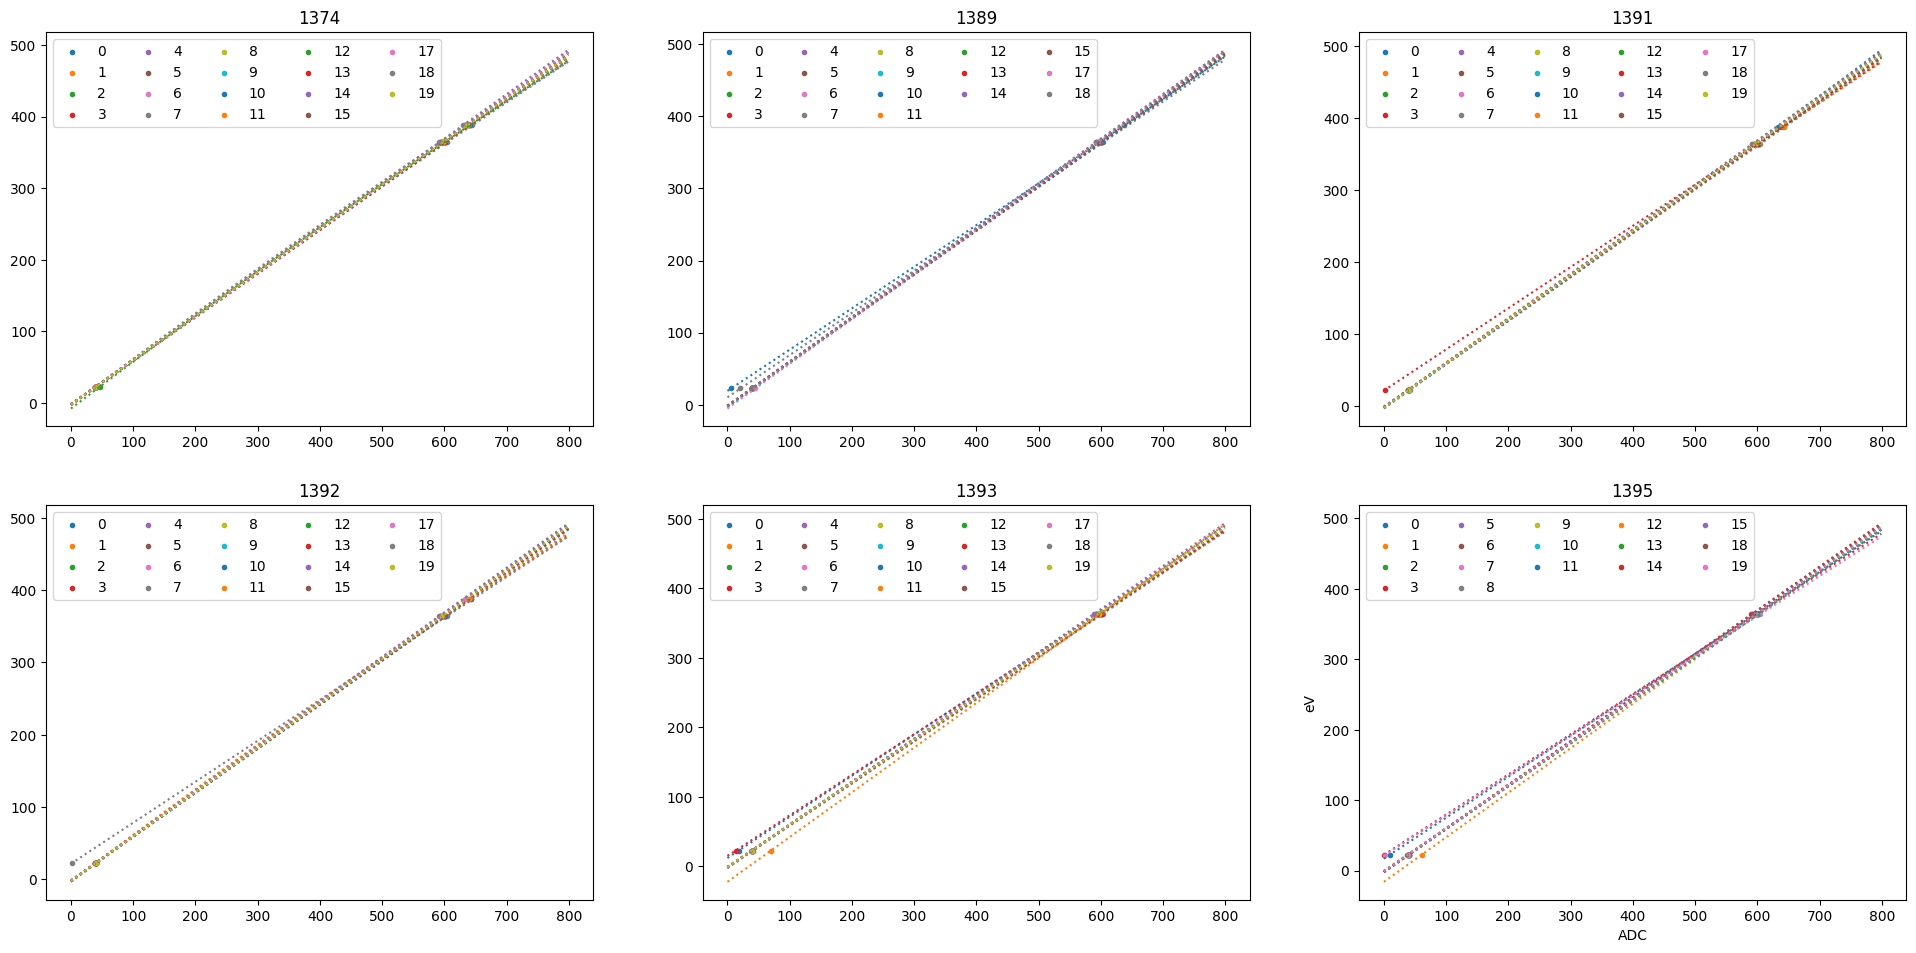

In [68]:
nrows,ncols=7,3
py.figure(figsize=(8*ncols,6*nrows))

toeV = []
for j in range(len(ADC_data)-1):
    fit_pars_toeV = []
    x = np.arange(0,800)
    
    for i in range(len(ADC_data[j])):
        ax=py.subplot(nrows,ncols,j+1)
        #if there are no points, skip the pixel
        if len(ADC_data[j][i])<=1:
            fit_pars_toeV.append([0])
            pass

        #only include the eV points associated with the corresponding ADC value
        elif len(ADC_data[j][i])<3:
            a, b = np.polyfit(ADC_data[j][i],eV_points[:2], deg=1)
            ax.scatter(ADC_data[j][i],eV_points[:2],marker = '.',label = '%d'%i)
            fit_pars_toeV.append([a,b])
            ax.plot(x,calibration_lin(x,a,b),linestyle = ':')
        else:
            a, b,c = np.polyfit(ADC_data[j][i], eV_points, deg=2)
            ax.scatter(ADC_data[j][i],eV_points,marker = '.',label = '%d'%i)
            fit_pars_toeV.append([a,b,c])
            ax.plot(x,calibration_quad(x,a,b,c),linestyle = ':')
    toeV.append(fit_pars_toeV)
    ax.legend(loc="upper left", ncol=5)
    ax.set_title('%d'%runs[j])
    

plt.xlabel('ADC')
plt.ylabel('eV')
plt.show()

In [69]:
def convert(x,pars):
    y = []
    for i in pars:
        if len(i)==3:
            quad = i[0]
            lin = i[1]
            intercept = i[2]
            y.append(quad*x**2 + lin*x + intercept)
            

        elif len(i)==2:
            lin = i[0]
            intercept = i[1]
            y.append(lin*x + intercept)
            
        else:
            y.append(0)
            
    return y

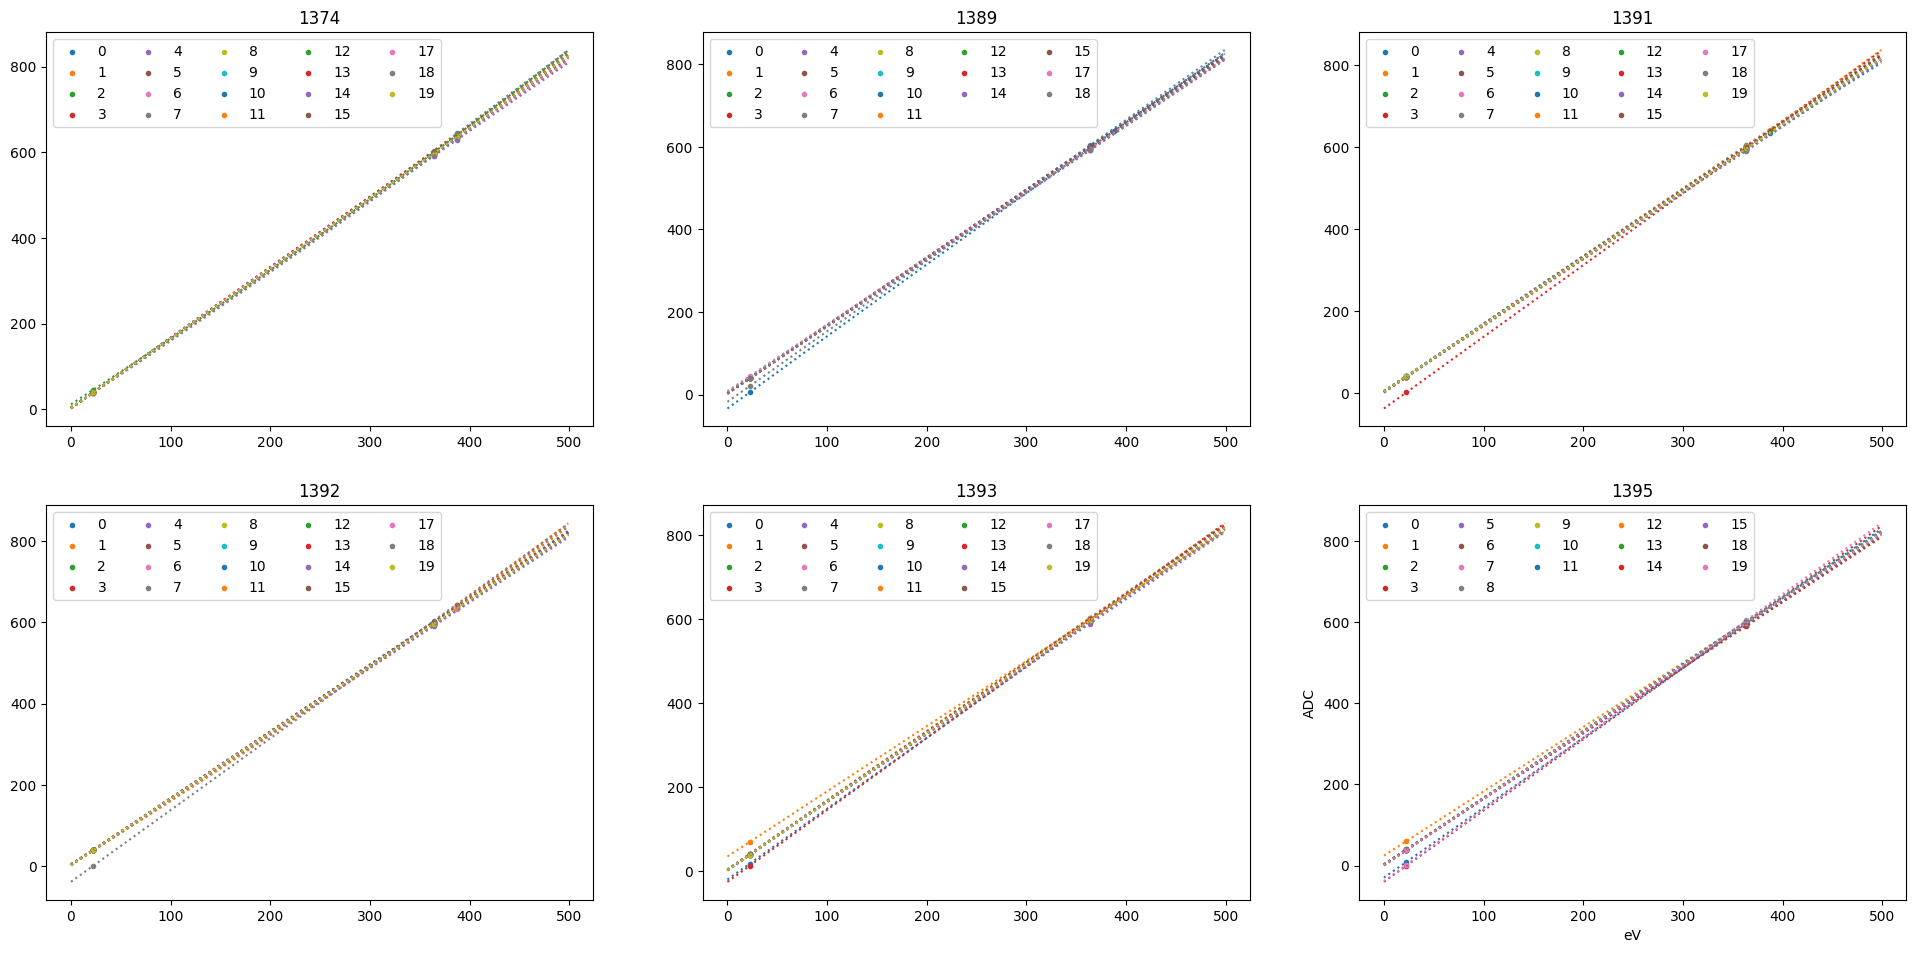

In [70]:
nrows,ncols=7,3
py.figure(figsize=(8*ncols,6*nrows))


toADC = []
for j in range(len(ADC_data)-1):
    fit_pars_toADC = []
    x = np.arange(0,500)
    
    for i in range(len(ADC_data[j])):
        ax=py.subplot(nrows,ncols,j+1)
        #if there are no points, skip the pixel
        if len(ADC_data[j][i])<=1:
            fit_pars_toADC.append([0])
            pass

        #only include the eV points associated with the corresponding ADC value
        elif len(ADC_data[j][i])<3:
            a, b = np.polyfit(eV_points[:2],ADC_data[j][i], deg=1)
            ax.scatter(eV_points[:2],ADC_data[j][i],marker = '.',label = '%d'%i)
            fit_pars_toADC.append([a,b])
            ax.plot(x,calibration_lin(x,a,b),linestyle = ':')
        else:
            a, b,c = np.polyfit(eV_points, ADC_data[j][i], deg=2)
            ax.scatter(eV_points,ADC_data[j][i],marker = '.',label = '%d'%i)
            fit_pars_toADC.append([a,b,c])
            ax.plot(x,calibration_quad(x,a,b,c),linestyle = ':')
        ax.legend(loc="upper left", ncol=5)
        ax.set_title('%d'%runs[j])
    toADC.append(fit_pars_toADC)
        
        
plt.xlabel('eV')
plt.ylabel('ADC')
plt.show()

In [71]:
def horizontal(dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 32px">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))
    
CSS = """
.output {
    flex-direction: row;
}
"""
from IPython.display import display, HTML
HTML('<style>{}</style>'.format(CSS))

In [72]:
len(toADC[5][14])

2

In [73]:
df_1374 = {'quad':[toADC[0][0][0],toADC[0][3][0],toADC[0][6][0],toADC[0][11][0],toADC[0][14][0]],'lin':[toADC[0][0][1],toADC[0][3][1],toADC[0][6][1],toADC[0][11][1],toADC[0][14][1]]}
df_1389 = {'quad':[toADC[1][0][0],'','','',''],'lin':[toADC[1][0][1],toADC[1][3][0],toADC[1][6][0],toADC[1][11][0],toADC[1][14][0]]}
df_1391 = {'quad':[toADC[2][0][0],'','','',''],'lin':[toADC[2][0][1],toADC[2][3][0],toADC[2][6][0],toADC[2][11][0],toADC[2][14][0]]}
df_1392 = {'quad':[toADC[3][0][0],'',toADC[3][6][0],toADC[3][11][0],''],'lin':[toADC[3][0][1],toADC[3][3][0],toADC[3][6][1],toADC[3][11][1],toADC[3][14][0]]}
df_1393 = {'quad':['','','','',''],'lin':[toADC[4][0][0],toADC[4][3][0],toADC[4][6][0],toADC[4][11][0],toADC[4][14][0]]}
df_1395 = {'quad':['','','','',''],'lin':[toADC[5][0][0],toADC[5][3][0],toADC[5][6][0],toADC[5][11][0],toADC[5][14][0]]}

In [74]:
horizontal([pd.DataFrame(df_1374).set_index([pd.Index([76, 87, 97, 106,114])]).style.set_caption('1374').set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}]),
           pd.DataFrame(df_1389).set_index([pd.Index([76, 87, 97, 106,114])]).style.set_caption('1389').set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}]),
           pd.DataFrame(df_1391).set_index([pd.Index([76, 87, 97, 106,114])]).style.set_caption('1391').set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}]),
           pd.DataFrame(df_1392).set_index([pd.Index([76, 87, 97, 106,114])]).style.set_caption('1392').set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}]),
           pd.DataFrame(df_1393).set_index([pd.Index([76, 87, 97, 106,114])]).style.set_caption('1393').set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}]),
           pd.DataFrame(df_1395).set_index([pd.Index([76, 87, 97, 106,114])]).style.set_caption('1395').set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}])])

,quad,lin
76,-0.000014,1.636818
87,-0.000060,1.660166
97,1.525246,1.525246
106,0.000178,1.564327
114,-0.000013,1.621456
,quad,lin
76,-0.000066,1.758349
87,,1.635296
97,,1.621884
106,,1.634026


In [75]:
def wave_func(x, a,b,c,d,e,f):
    return a + b*x + c*x**2.0 + d*np.exp(-(x-e)/1250.0) / (1.0 + np.exp(-(x-e)/f))

In [76]:
def wave_fit(wave, func, pretrig=3000,p0=None):
    # print(wave,'wave')
    # print(pretrig,'pretrig')
    # print(len(wave),'len')
    xdata = np.arange(0,len(wave))
    
    # print(xdata,'x')
    
    prewave = wave[0:int(pretrig)]
    
    # print(prewave,'prewave')
    
    base = np.average(prewave)
    
    # print(base,'base')
    
    ydata = wave - base
    
    # print(ydata,'y')
    
    if p0 == None:
        popt, pcov = curve_fit(func, xdata, ydata,maxfev=4000)
    
    else:
        try:
            popt, pcov = curve_fit(func, xdata, ydata, p0)
        except Exception as e:
            plt.plot(wave)
            return 0,0
    # print(popt,'t')
    # print(pcov,'v')
    
    return func(xdata, *popt)+ base, popt

In [77]:
def risetime(wave,fit_mid,low=0.1, high=0.9,pretrigger=[3000,3400], cut=0,max_delay=0, max_length=50):
    try:
        shift = np.mean(wave[pretrigger[0]:pretrigger[1]])
        wave = wave - shift
        if max_delay == 0:
            maxval = np.max(wave)
        else:
            maxval = np.mean(wave[3500+max_delay:3500+max_delay+max_length])

    #     plt.axhline(maxval,color='orange')
    #     print(maxval)

        wave = wave[cut:]
        xs = np.arange(len(wave))*4

        upperCross = maxval * high
        lowerCross = maxval * low
    #     print(maxval)

        x = np.arange(0,7000)
    #     plt.axvline(fit_mid,color='black')
    #     plt.plot(x[3470:3570],wave[3470:3570])
    #     plt.axvline(upperCross,color = 'red')
    #     plt.axvline(lowerCross,color = 'green')

        upCrossPoint = np.argwhere(wave[int(fit_mid):]>upperCross)[0][0]+int(fit_mid)
    #     upCrossPoint = np.argwhere(wave[int(fit_mid):]>upperCross)[0][0]+int(fit_mid)
        lowCrossPoint = np.argwhere(wave[:int(fit_mid)]<lowerCross)[-1][0]+1

    #     plt.axvline(upCrossPoint,color = 'red')
    #     plt.axvline(lowCrossPoint,color = 'green')
    #     print(lowerCross)
    #     print(upCrossPoint,lowCrossPoint)
        upper = np.interp(upperCross, wave[upCrossPoint-1:upCrossPoint+1], xs[upCrossPoint-1:upCrossPoint+1])
        lower = np.interp(lowerCross, wave[lowCrossPoint-1:lowCrossPoint+1], xs[lowCrossPoint-1:lowCrossPoint+1])
        # print(l)
    #     print(upper)
    #     print(lower)
        return upper-lower, [lower/4+cut, upper/4+cut, maxval+shift]
    except:
        plt.plot(wave)
        # plt.xlim(3400,3600)
        plt.show()
        return 0 , [0,0,0]

In [78]:
convert(370,toADC[0])

[np.float64(605.9846514566597),
 np.float64(610.9382201988683),
 np.float64(609.8778778816508),
 np.float64(607.903500711475),
 np.float64(611.4482792292761),
 np.float64(611.3873002450413),
 np.float64(602.9768142678195),
 np.float64(614.285619193152),
 np.float64(610.6182404545185),
 np.float64(607.2551531945717),
 np.float64(610.857709237772),
 np.float64(607.6483923699989),
 np.float64(604.9833336358919),
 np.float64(610.459831269062),
 np.float64(601.1455887097275),
 np.float64(606.7895406447923),
 0,
 np.float64(606.3724962259221),
 np.float64(603.6091218748403),
 np.float64(607.7647812803325)]

In [79]:
[convert(356,toADC[i]) for i in range(len(toADC))][0][0]

np.float64(583.2086147109729)

In [80]:
%%time

runNumber = 1374
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 6.73 s, sys: 19.5 s, total: 26.3 s
Wall time: 16min 7s


In [81]:
risetimeDistribution_76 = []
risetimeDistribution_87 = []
risetimeDistribution_97 = []
risetimeDistribution_106 = []
risetimeDistribution_114 = []
time76 = []
time87 = []
time97 = []
time106 = []
time114 = []

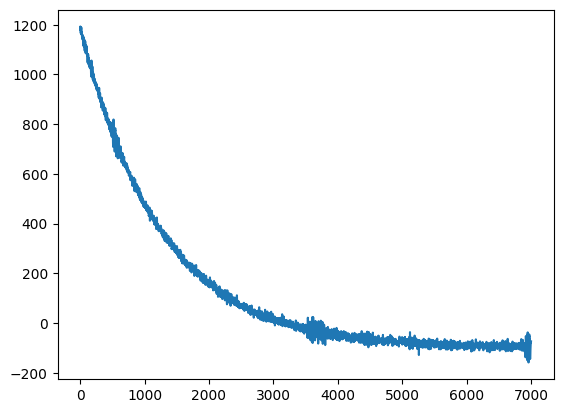

CPU times: user 3min 43s, sys: 6.74 s, total: 3min 50s
Wall time: 2min 30s


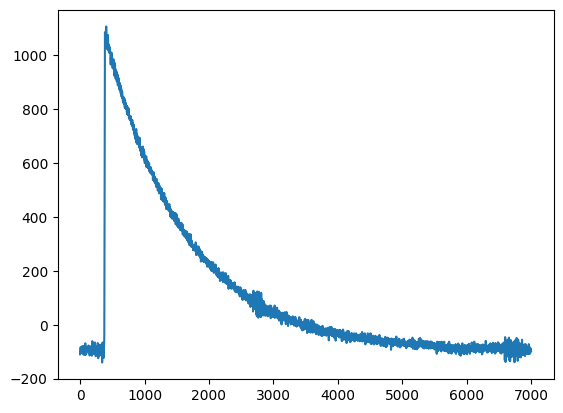

In [82]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][0][0], [convert(370,toADC[i]) for i in range(len(toADC))][0][0])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()



risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_76.append(risetimeDistribution)
time76.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 87)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][0][3], [convert(370,toADC[i]) for i in range(len(toADC))][0][3])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_87.append(risetimeDistribution)
time87.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 97)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][0][6], [convert(370,toADC[i]) for i in range(len(toADC))][0][6])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_97.append(risetimeDistribution)
time97.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 106)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][0][11], [convert(370,toADC[i]) for i in range(len(toADC))][0][11])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_106.append(risetimeDistribution)
time106.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 114)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][0][14], [convert(370,toADC[i]) for i in range(len(toADC))][0][14])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])
    
risetimeDistribution_114.append(risetimeDistribution)
time114.append(time_mid)

In [83]:
%%time

runNumber = 1389
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 1.33 s, sys: 4 s, total: 5.32 s
Wall time: 4min 12s


In [84]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][1][0], [convert(370,toADC[i]) for i in range(len(toADC))][1][0])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])
    
risetimeDistribution_76.append(risetimeDistribution)
time76.append(time_mid)


run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 87)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][1][3], [convert(370,toADC[i]) for i in range(len(toADC))][1][3])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_87.append(risetimeDistribution)
time87.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 97)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][1][6], [convert(370,toADC[i]) for i in range(len(toADC))][1][6])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_97.append(risetimeDistribution)
time97.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 106)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][1][11], [convert(370,toADC[i]) for i in range(len(toADC))][1][11])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_106.append(risetimeDistribution)
time106.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 114)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][1][14], [convert(370,toADC[i]) for i in range(len(toADC))][1][14])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])
    
risetimeDistribution_114.append(risetimeDistribution)
time114.append(time_mid)

CPU times: user 45 s, sys: 2.59 s, total: 47.6 s
Wall time: 23.1 s


In [85]:
%%time

runNumber = 1391
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 1.13 s, sys: 3.37 s, total: 4.51 s
Wall time: 3min 11s


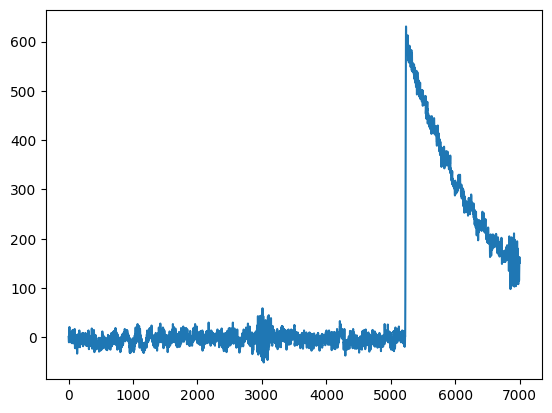

CPU times: user 30.9 s, sys: 602 ms, total: 31.5 s
Wall time: 17.7 s


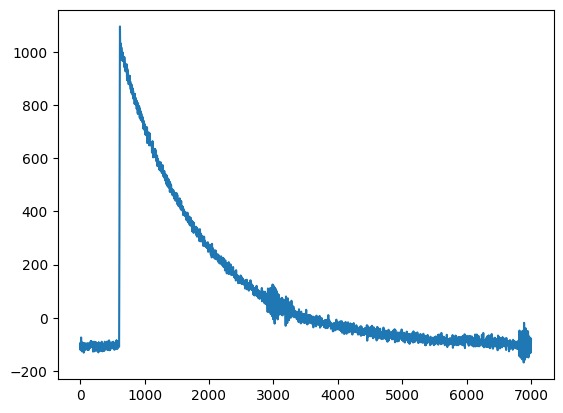

In [86]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][2][0], [convert(370,toADC[i]) for i in range(len(toADC))][2][0])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_76.append(risetimeDistribution)
time76.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 87)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][2][3], [convert(370,toADC[i]) for i in range(len(toADC))][2][3])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_87.append(risetimeDistribution)
time87.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 97)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][2][6], [convert(370,toADC[i]) for i in range(len(toADC))][2][6])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_97.append(risetimeDistribution)
time97.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 106)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][2][11], [convert(370,toADC[i]) for i in range(len(toADC))][2][11])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_106.append(risetimeDistribution)
time106.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 114)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][2][14], [convert(370,toADC[i]) for i in range(len(toADC))][2][14])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])
    
risetimeDistribution_114.append(risetimeDistribution)
time114.append(time_mid)

In [87]:
%%time

runNumber = 1392
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 2.03 s, sys: 6 s, total: 8.03 s
Wall time: 4min 29s


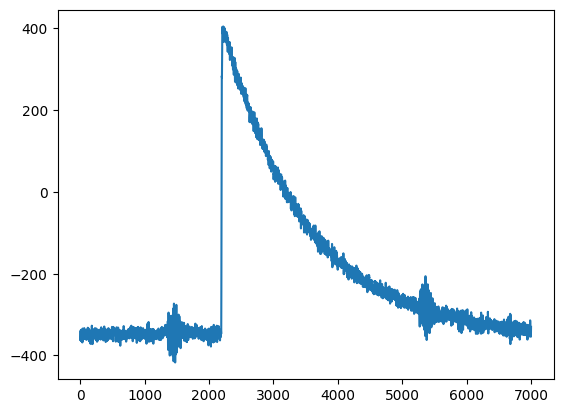

CPU times: user 1min 1s, sys: 1.49 s, total: 1min 2s
Wall time: 35.3 s


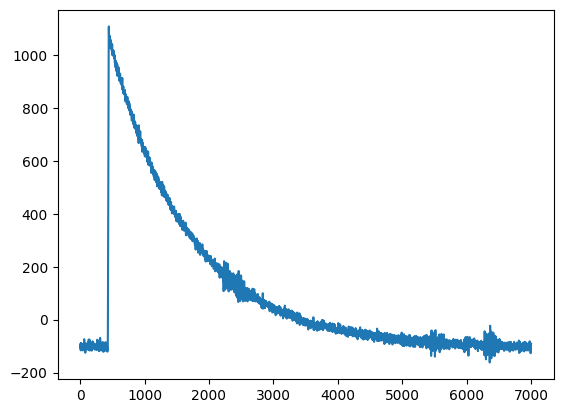

In [88]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][3][0], [convert(370,toADC[i]) for i in range(len(toADC))][3][0])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_76.append(risetimeDistribution)
time76.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 87)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][3][3], [convert(370,toADC[i]) for i in range(len(toADC))][3][3])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_87.append(risetimeDistribution)
time87.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 97)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][3][6], [convert(370,toADC[i]) for i in range(len(toADC))][3][6])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_97.append(risetimeDistribution)
time97.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 106)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][3][11], [convert(370,toADC[i]) for i in range(len(toADC))][3][11])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_106.append(risetimeDistribution)
time106.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 114)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][3][14], [convert(370,toADC[i]) for i in range(len(toADC))][3][14])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])
    
risetimeDistribution_114.append(risetimeDistribution)
time114.append(time_mid)

In [89]:
%%time

runNumber = 1393
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 1.24 s, sys: 3.4 s, total: 4.64 s
Wall time: 3min 6s


In [90]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][4][0], [convert(370,toADC[i]) for i in range(len(toADC))][4][0])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_76.append(risetimeDistribution)
time76.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 87)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][4][3], [convert(370,toADC[i]) for i in range(len(toADC))][4][3])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_87.append(risetimeDistribution)
time87.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 97)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][4][6], [convert(370,toADC[i]) for i in range(len(toADC))][4][6])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_97.append(risetimeDistribution)
time97.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 106)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][4][11], [convert(370,toADC[i]) for i in range(len(toADC))][4][11])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_106.append(risetimeDistribution)
time106.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 114)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][4][14], [convert(370,toADC[i]) for i in range(len(toADC))][4][14])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])
    
risetimeDistribution_114.append(risetimeDistribution)
time114.append(time_mid)

CPU times: user 33.7 s, sys: 585 ms, total: 34.3 s
Wall time: 18.1 s


In [91]:
%%time

runNumber = 1395
directory = '/storage/home/hcoda1/4/ashelby8/scratch/ManitobaData/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

CPU times: user 1.28 s, sys: 3.49 s, total: 4.77 s
Wall time: 2min 30s


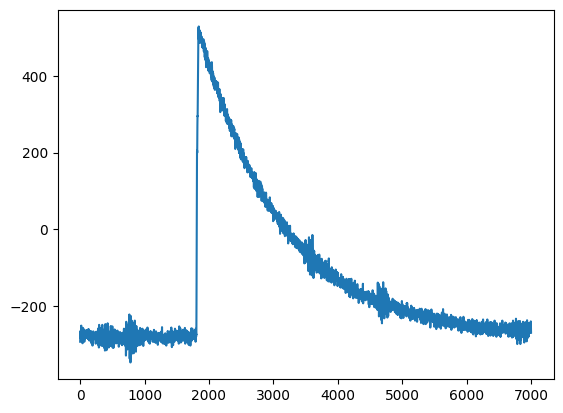

CPU times: user 33.8 s, sys: 635 ms, total: 34.4 s
Wall time: 17.4 s


In [92]:
%%time

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 76)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][5][0], [convert(370,toADC[i]) for i in range(len(toADC))][5][0])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_76.append(risetimeDistribution)
time76.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 87)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][5][3], [convert(370,toADC[i]) for i in range(len(toADC))][5][3])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_87.append(risetimeDistribution)
time87.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 97)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][5][6], [convert(370,toADC[i]) for i in range(len(toADC))][5][6])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_97.append(risetimeDistribution)
time97.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 106)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][5][11], [convert(370,toADC[i]) for i in range(len(toADC))][5][11])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])

risetimeDistribution_106.append(risetimeDistribution)
time106.append(time_mid)

run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 114)

results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

results.resetCuts()
results.defineCut('energy', 'between', [convert(356,toADC[i]) for i in range(len(toADC))][5][14], [convert(370,toADC[i]) for i in range(len(toADC))][5][14])

cut = results.returnCut()
run.singleWaves().defineCut('custom', cut)

waves = run.singleWaves().waves()


risetimeDistribution = []
time_mid = []
for i in range(len(waves)):
    func, par = wave_fit(waves[i].compute(),wave_func,p0=[-5,5e-7,1e-10,-20,3500,10])
    if type(par)==int:
        pass
    else:
        time_mid.append(par[4])
        risetimeDistribution.append(risetime(waves[i].compute(),par[4],low=0.1, high=0.9)[0])
    
    
risetimeDistribution_114.append(risetimeDistribution)
time114.append(time_mid)

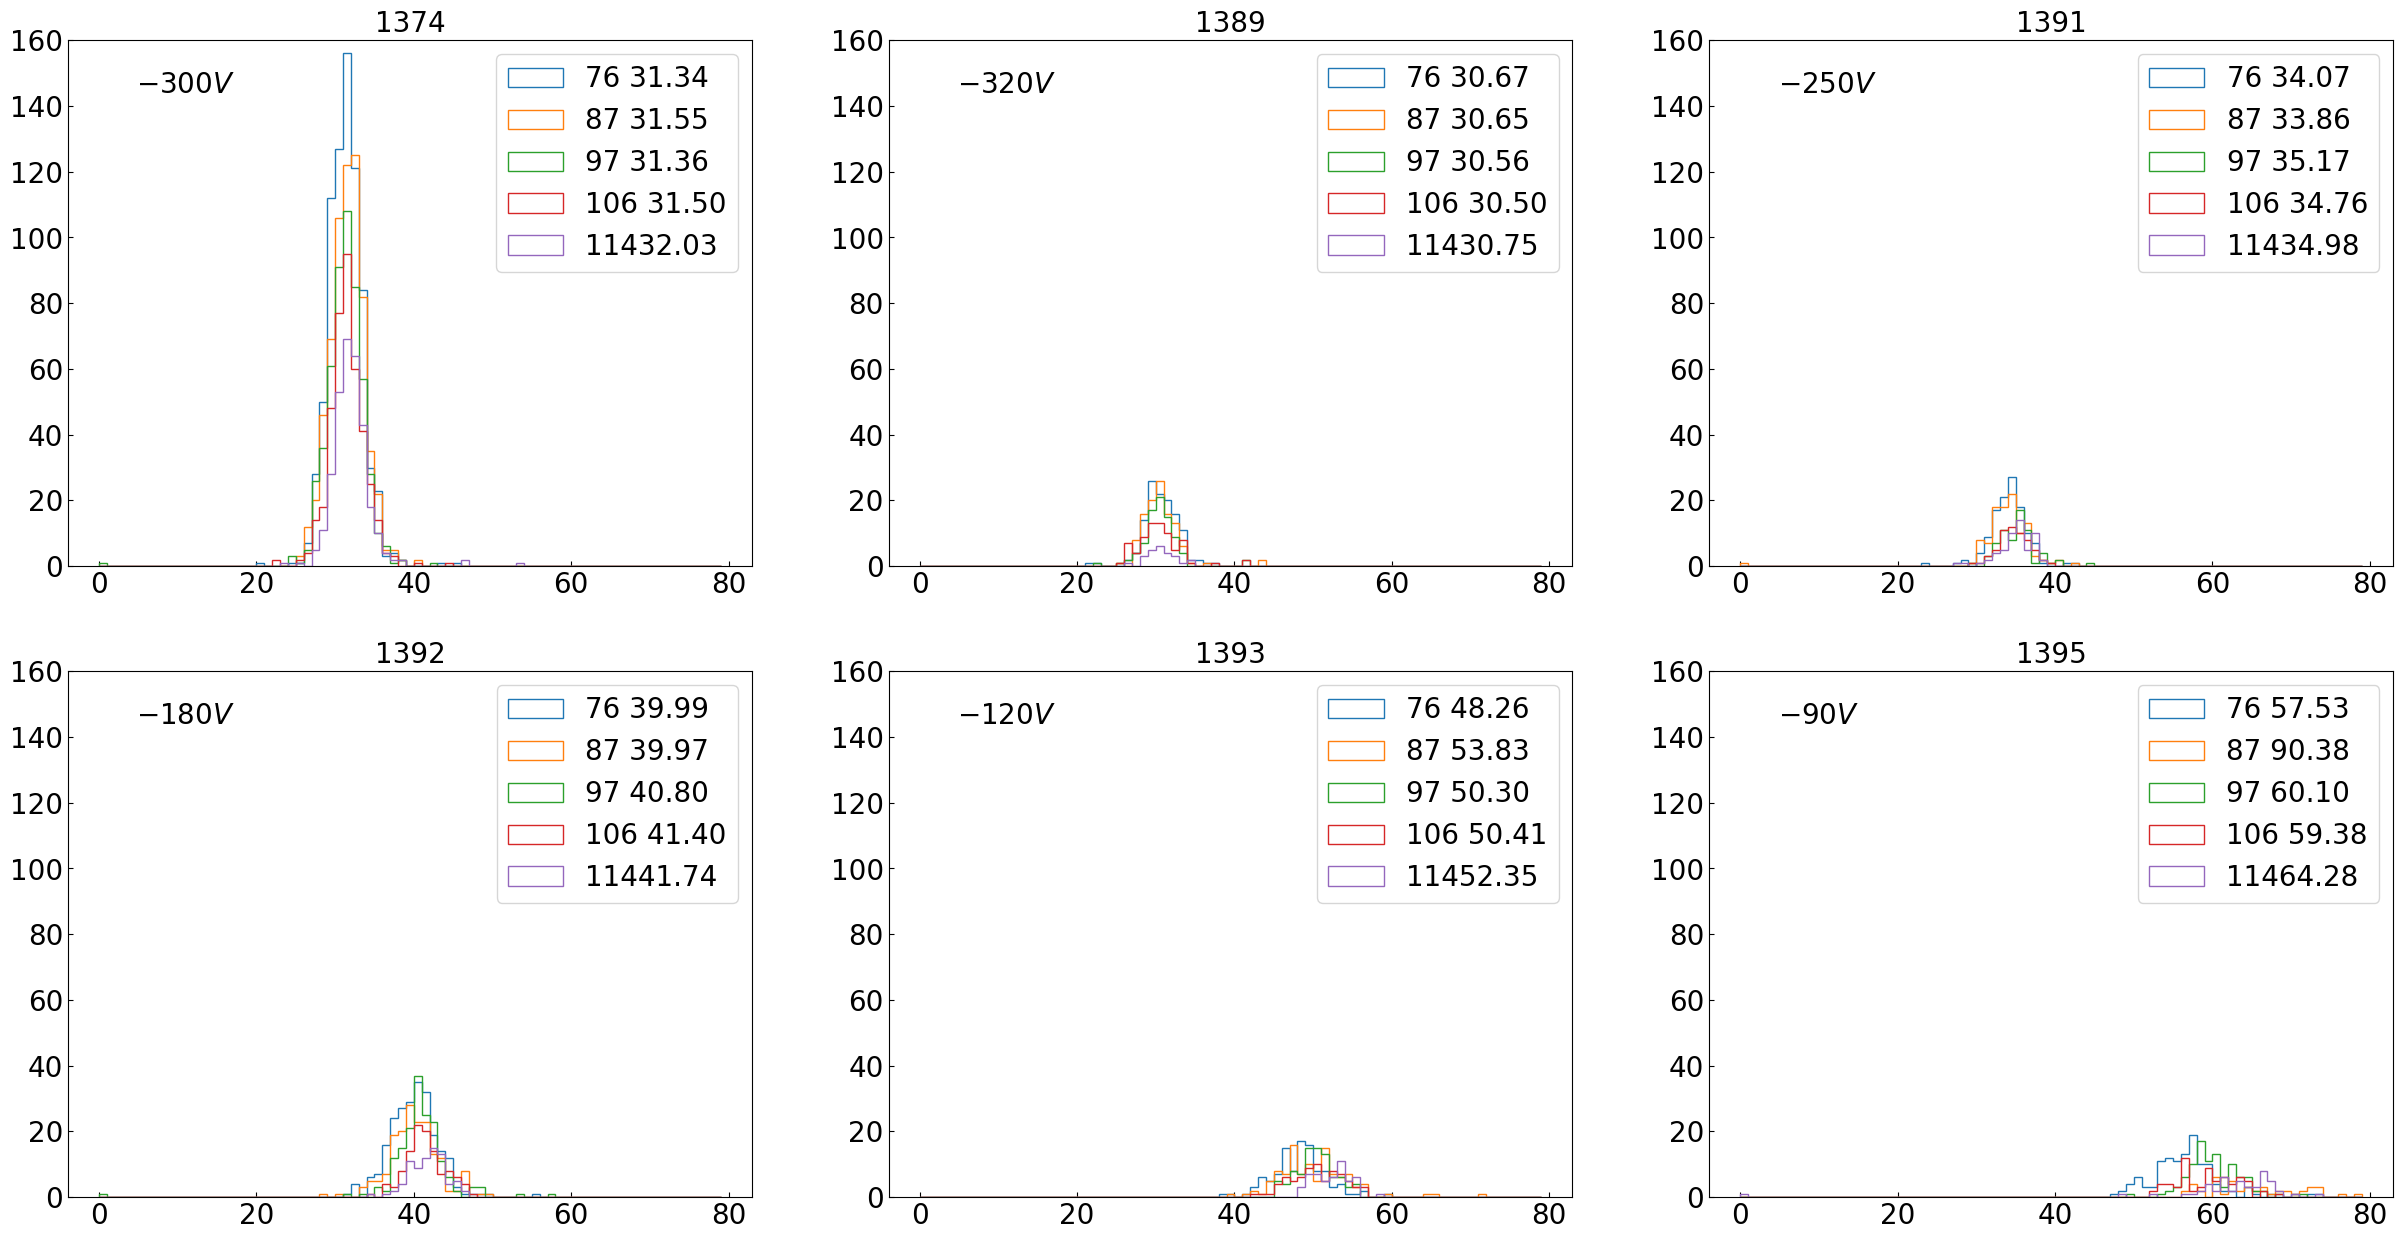

In [93]:
nrows,ncols=7,3
py.figure(figsize=(10*ncols,8*nrows))
for i in range(6):
    ax=py.subplot(nrows,ncols,i+1)
    ax.hist(risetimeDistribution_76[i],bins = np.arange(0,80),label = '76 %.2f'%np.mean(risetimeDistribution_76[i]),histtype='step')
    ax.hist(risetimeDistribution_87[i],bins = np.arange(0,80),label = '87 %.2f'%np.mean(risetimeDistribution_87[i]),histtype='step')
    ax.hist(risetimeDistribution_97[i],bins = np.arange(0,80),label = '97 %.2f'%np.mean(risetimeDistribution_97[i]),histtype='step')
    ax.hist(risetimeDistribution_106[i],bins = np.arange(0,80),label = '106 %.2f'%np.mean(risetimeDistribution_106[i]),histtype='step')
    ax.hist(risetimeDistribution_114[i],bins = np.arange(0,80),label = '114%.2f'%np.mean(risetimeDistribution_114[i]),histtype='step')
    ax.legend(prop={'size':20})
    ax.set_ylim(0,160)
    ax.set_title('%d'%runs[i],size=20)
    ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
    if i==0:
        ax.text(0.1,0.9,r'$-300 V$',transform=ax.transAxes,size=20)
    if i==1:
        ax.text(0.1,0.9,r'$-320 V$',transform=ax.transAxes,size=20)
    if i==2:
        ax.text(0.1,0.9,r'$-250 V$',transform=ax.transAxes,size=20)
    if i==3:
        ax.text(0.1,0.9,r'$-180 V$',transform=ax.transAxes,size=20)
    if i==4:
        ax.text(0.1,0.9,r'$-120 V$',transform=ax.transAxes,size=20)
    if i==5:
        ax.text(0.1,0.9,r'$-90 V$',transform=ax.transAxes,size=20)
plt.show()

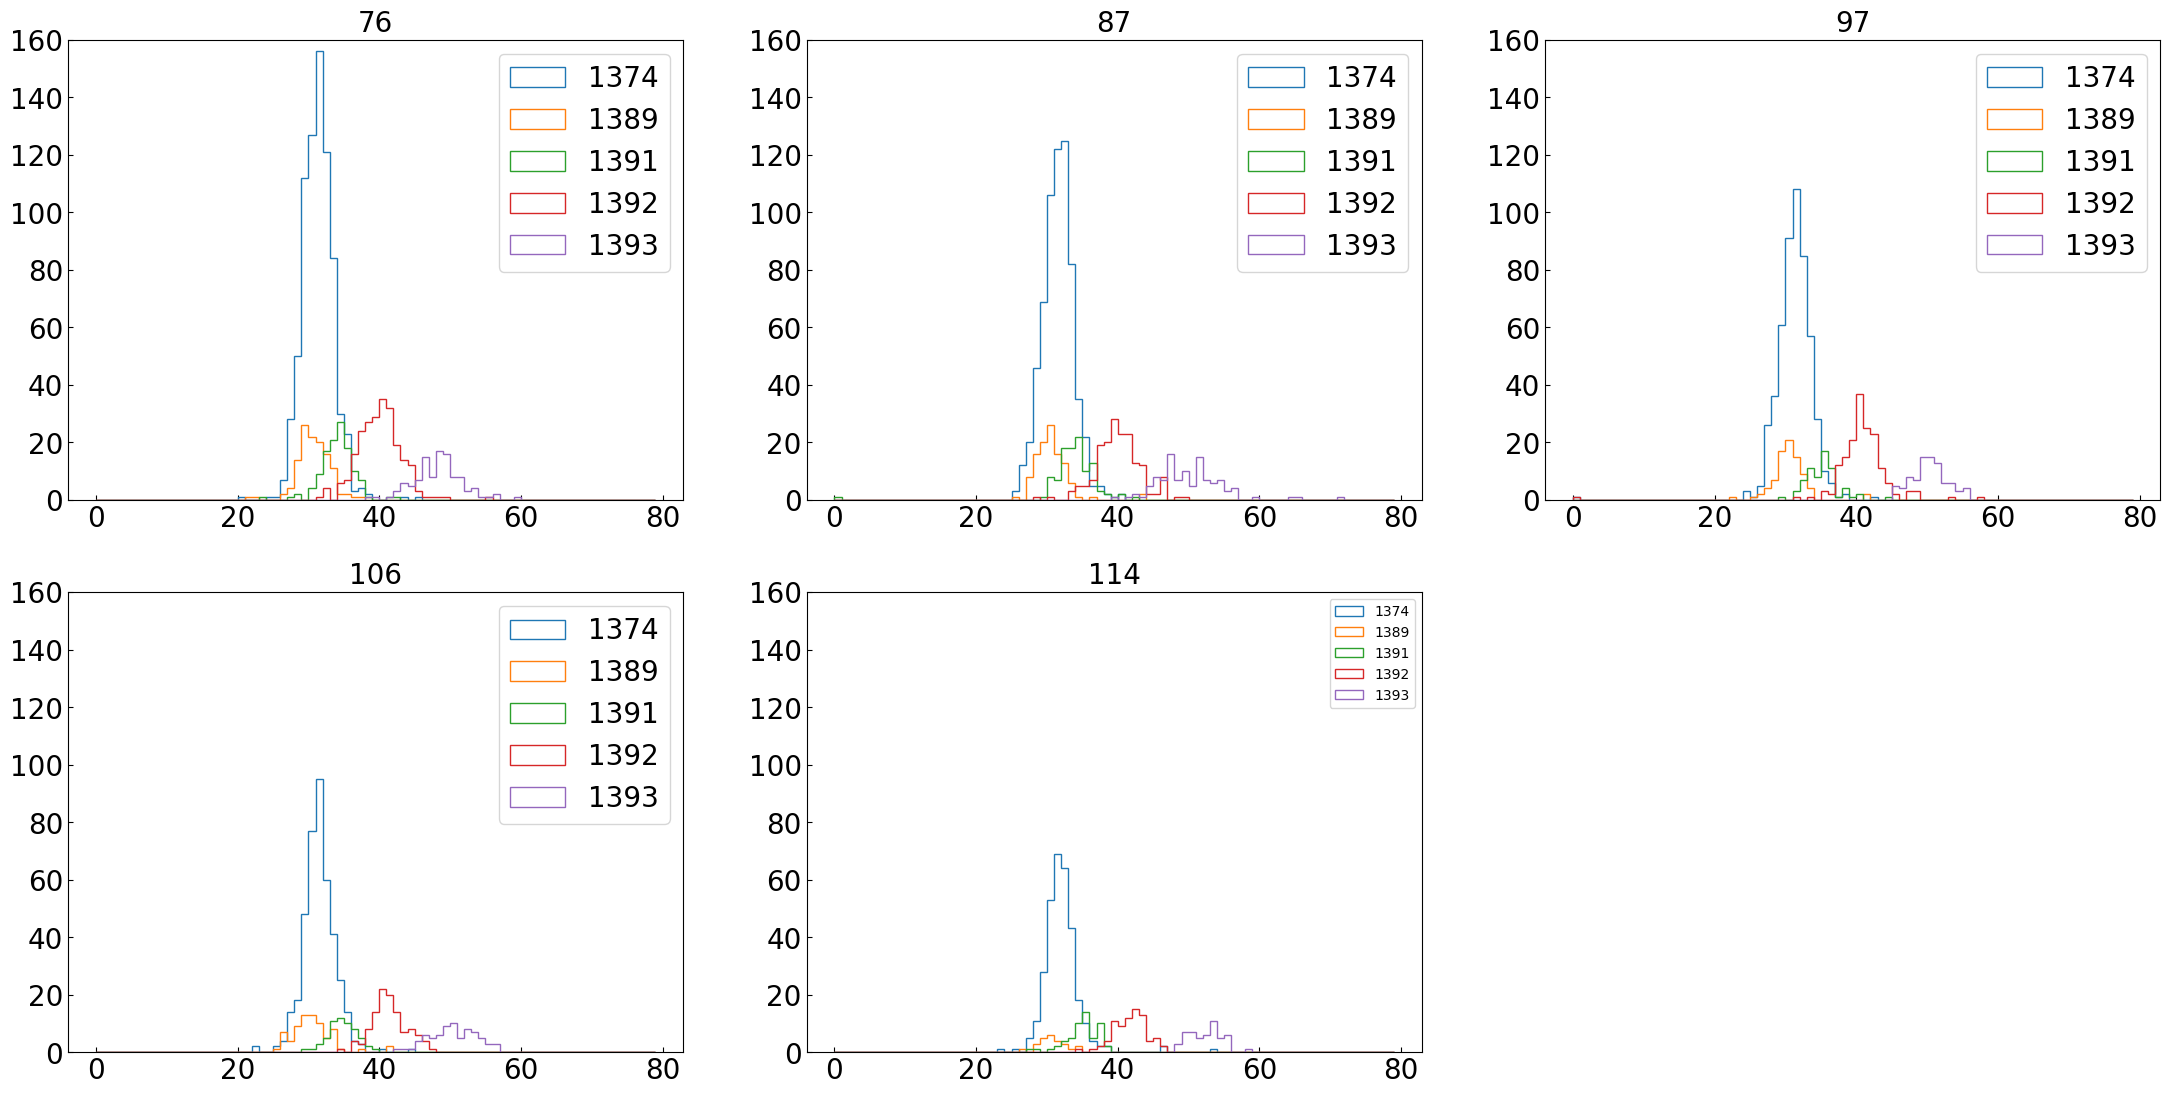

In [94]:
nrows,ncols=7,3
py.figure(figsize=(9*ncols,7*nrows))
for i in range(5):
    ax=py.subplot(nrows,ncols,1)
    ax.set_ylim(0,160)
    ax.hist(risetimeDistribution_76[i],bins = np.arange(0,80),label = '%d'%runs[i],histtype='step')
    ax.set_title('%d'%76,size=20)
    ax.legend(prop={'size':20})
    ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
for i in range(5):
    ax=py.subplot(nrows,ncols,2)
    ax.set_ylim(0,160)
    ax.hist(risetimeDistribution_87[i],bins = np.arange(0,80),label = '%d'%runs[i],histtype='step')
    ax.set_title('%d'%87,size=20)
    ax.legend(prop={'size':20})
    ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
for i in range(5):
    ax=py.subplot(nrows,ncols,3)
    ax.set_ylim(0,160)
    ax.hist(risetimeDistribution_97[i],bins = np.arange(0,80),label = '%d'%runs[i],histtype='step')
    ax.set_title('%d'%97,size=20)
    ax.legend(prop={'size':20})
    ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
for i in range(5):
    ax=py.subplot(nrows,ncols,4)
    ax.set_ylim(0,160)
    ax.hist(risetimeDistribution_106[i],bins = np.arange(0,80),label = '%d'%runs[i],histtype='step')
    ax.set_title('%d'%106,size=20)
    ax.legend(prop={'size':20})
    ax.tick_params(direction='in',which='both',axis='both',labelsize=20)
for i in range(5):
    ax=py.subplot(nrows,ncols,5)
    ax.set_ylim(0,160)
    ax.hist(risetimeDistribution_114[i],bins = np.arange(0,80),label = '%d'%runs[i],histtype='step')
    ax.legend(prop={'size':20})
    ax.set_title('%d'%114,size=20)
    ax.legend()
    ax.tick_params(direction='in',which='both',axis='both',labelsize=20)

plt.show()

In [95]:
# plt.plot(ecap_data['p1'],marker = 'o',label = '363 centroid')
# plt.axhline(np.mean(ecap_data['p1']),linestyle = '--',color = 'orange',label = 'mean')
# plt.title('pixel:98')

# plt.xticks(np.arange(0,7),runs[0:7])
# plt.xlabel('run')
# plt.ylabel('ADC')
# plt.legend()
# plt.show()